In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from warnings import filterwarnings
filterwarnings('ignore')


# 1st Dataset- Electric_Vehicle_Population_Data.csv

In this dataset(Electric_Vehicle_Population_Data.csv),we will try to find out the Base MSRP of the vehicle so that it will be easy to ascertain income group of our customer

In [2]:
#Reading the dataset
df=pd.read_csv('Electric_Vehicle_Population_Data.csv')
df.head()

VIN (1-10)   County        City State  ZIP Code  Model Year   Make  \
0  WA1AAAGE2M   Kitsap     POULSBO    WA     98370        2021   AUDI   
1  WBY8P2C00L     King     SEATTLE    WA     98122        2020    BMW   
2  5YJXCBE21K  Cowlitz  SILVERLAKE    WA     98645        2019  TESLA   
3  1FTZR081XY     King     SEATTLE    WA     98117        2000   FORD   
4  WBY1Z6C55H     King     SEATTLE    WA     98119        2017    BMW   

     Model           Electric Vehicle Type  \
0   E-TRON  Battery Electric Vehicle (BEV)   
1       I3  Battery Electric Vehicle (BEV)   
2  MODEL X  Battery Electric Vehicle (BEV)   
3   RANGER  Battery Electric Vehicle (BEV)   
4       I3  Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             222   
1           Clean Alternative Fuel Vehicle Eligible             153   
2           Clean Alternative Fuel Vehicle Eligible             289   
3           Clean Alternative Fuel Vehicle Eligible              58   
4           Clean Alternative Fuel Vehicle Eligible              81   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                  23.0       148815901   
1          0                  37.0       132197810   
2          0                  20.0       154341673   
3          0                  36.0       169378338   
4          0                  36.0       192605101   

                        Vehicle Location  
0  POINT (-122.63339300000001 47.748427)  
1           POINT (-122.303413 47.61065)  
2          POINT (-122.772699 46.320526)  
3          POINT (-122.379354 47.687571)  
4  POINT (-122.36772100000002 47.639264)

In [3]:
#Checking the shape
df.shape

(79767, 15)

In [4]:
#Columns name
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'ZIP Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79767 entries, 0 to 79766
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         79767 non-null  object 
 1   County                                             79762 non-null  object 
 2   City                                               79767 non-null  object 
 3   State                                              79767 non-null  object 
 4   ZIP Code                                           79767 non-null  int64  
 5   Model Year                                         79767 non-null  int64  
 6   Make                                               79767 non-null  object 
 7   Model                                              79767 non-null  object 
 8   Electric Vehicle Type                              79767 non-null  object 
 9   Clean 

There are 6 numerical and 9 categorical columns

In [6]:
#Checking for null values
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   0
State                                                  0
ZIP Code                                               0
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 146
DOL Vehicle ID                                         0
Vehicle Location                                       4
dtype: int64

In [7]:
#Based on our domain knowledge we will drop several columns we are not required for our analysis
#VIN (1-10),County,ZIP Code,Legislative District,DOL Vehicle ID,Vehicle Location

In [8]:
df=df.drop(['VIN (1-10)','County','ZIP Code','Legislative District','DOL Vehicle ID','Vehicle Location'],axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79767 entries, 0 to 79766
Data columns (total 9 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   City                                               79767 non-null  object
 1   State                                              79767 non-null  object
 2   Model Year                                         79767 non-null  int64 
 3   Make                                               79767 non-null  object
 4   Model                                              79767 non-null  object
 5   Electric Vehicle Type                              79767 non-null  object
 6   Clean Alternative Fuel Vehicle (CAFV) Eligibility  79767 non-null  object
 7   Electric Range                                     79767 non-null  int64 
 8   Base MSRP                                          79767 non-null  int64 
dtypes: int64(3), objec

In [10]:
#Again checking null values
df.isnull().sum()

City                                                 0
State                                                0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
dtype: int64

In [11]:
df['Base MSRP'].value_counts()

0         75289
69900      1537
34600       531
31950       460
28500       232
52900       203
32250       176
38500       168
59900       153
54950       132
39995       119
44100        99
36900        87
64950        83
33950        68
45600        54
36800        52
55700        47
52650        45
34995        44
110950       29
98950        27
81100        17
53400        16
90700        16
102000       15
75095        14
35390        11
43700        11
184400       10
89100         9
109000        5
91250         3
32995         2
845000        1
66300         1
32000         1
Name: Base MSRP, dtype: int64

In [12]:
df.tail(25)

City State  Model Year        Make                  Model  \
79742      BELLEVUE    WA        2021       TESLA                MODEL Y   
79743        AUBURN    WA        2017        FORD                 FUSION   
79744     BREMERTON    WA        2014      NISSAN                   LEAF   
79745        RENTON    WA        2019         KIA          NIRO ELECTRIC   
79746    MARYSVILLE    WA        2013      NISSAN                   LEAF   
79747      BELLEVUE    WA        2019   CHEVROLET                BOLT EV   
79748  PORT ORCHARD    WA        2013      NISSAN                   LEAF   
79749       BOTHELL    WA        2020       TESLA                MODEL 3   
79750     SNOHOMISH    WA        2016     HYUNDAI  SONATA PLUG-IN HYBRID   
79751         LACEY    WA        2014        FORD                 FUSION   
79752       SEATTLE    WA        2017   CHEVROLET                BOLT EV   
79753        YAKIMA    WA        2020       TESLA                MODEL 3   
79754     SAMMAMISH    WA        2020       TESLA                MODEL 3   
79755       LAKEBAY    WA        2016      NISSAN                   LEAF   
79756     BREMERTON    WA        2011      NISSAN                   LEAF   
79757       SEATTLE    WA        2017         KIA                   NIRO   
79758     SAMMAMISH    WA        2018       TESLA                MODEL X   
79759        MONROE    WA        2016        FORD                 FUSION   
79760       SEATTLE    WA        2013       TESLA                MODEL S   
79761        AUBURN    WA        2015      NISSAN                   LEAF   
79762       SEATTLE    WA        2018  MITSUBISHI              OUTLANDER   
79763     DEER PARK    WA        2020   CHEVROLET                BOLT EV   
79764       SEATTLE    WA        2020       TESLA                MODEL Y   
79765      LAKEWOOD    WA        2020   CHEVROLET                BOLT EV   
79766       SPOKANE    WA        2018       TESLA                MODEL 3   

                        Electric Vehicle Type  \
79742          Battery Electric Vehicle (BEV)   
79743  Plug-in Hybrid Electric Vehicle (PHEV)   
79744          Battery Electric Vehicle (BEV)   
79745          Battery Electric Vehicle (BEV)   
79746          Battery Electric Vehicle (BEV)   
79747          Battery Electric Vehicle (BEV)   
79748          Battery Electric Vehicle (BEV)   
79749          Battery Electric Vehicle (BEV)   
79750  Plug-in Hybrid Electric Vehicle (PHEV)   
79751  Plug-in Hybrid Electric Vehicle (PHEV)   
79752          Battery Electric Vehicle (BEV)   
79753          Battery Electric Vehicle (BEV)   
79754          Battery Electric Vehicle (BEV)   
79755          Battery Electric Vehicle (BEV)   
79756          Battery Electric Vehicle (BEV)   
79757          Battery Electric Vehicle (BEV)   
79758          Battery Electric Vehicle (BEV)   
79759  Plug-in Hybrid Electric Vehicle (PHEV)   
79760          Battery Electric Vehicle (BEV)   
79761          Battery Electric Vehicle (BEV)   
79762          Battery Electric Vehicle (BEV)   
79763          Battery Electric Vehicle (BEV)   
79764          Battery Electric Vehicle (BEV)   
79765          Battery Electric Vehicle (BEV)   
79766          Battery Electric Vehicle (BEV)   

       Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
79742  Eligibility unknown as battery range has not b...               0   
79743              Not eligible due to low battery range              21   
79744            Clean Alternative Fuel Vehicle Eligible              84   
79745            Clean Alternative Fuel Vehicle Eligible             239   
79746            Clean Alternative Fuel Vehicle Eligible              75   
79747            Clean Alternative Fuel Vehicle Eligible             238   
79748            Clean Alternative Fuel Vehicle Eligible              75   
79749            Clean Alternative Fuel Vehicle Eligible             266   
79750              Not eligible due to low battery range              27   
797

From the analysis of the data,we can clearly see cars where Base MSRP is 0,which in real life is not possible.So we will drop those.

In [13]:
#Filtering those rows where Base MSRP is not zero
df_filt = df[df['Base MSRP'] != 0]

In [14]:
df_filt.shape

(4478, 9)

# EDA

In [15]:
df_filt.head(50)

City State  Model Year      Make                  Model  \
53         SEATTLE    WA        2013     TESLA                MODEL S   
60        PUYALLUP    WA        2019       KIA  OPTIMA PLUG-IN HYBRID   
86         REDMOND    WA        2013     TESLA                MODEL S   
92      BELLINGHAM    WA        2012     TESLA                MODEL S   
112         AUBURN    WA        2012     TESLA                MODEL S   
134         RENTON    WA        2016   HYUNDAI  SONATA PLUG-IN HYBRID   
162      SAMMAMISH    WA        2013     TESLA                MODEL S   
171         TACOMA    WA        2016       KIA                   SOUL   
190    WOODINVILLE    WA        2014     TESLA                MODEL S   
198        REDMOND    WA        2016       KIA                   SOUL   
212   MOUNT VERNON    WA        2018       BMW            530E XDRIVE   
224         TACOMA    WA        2014     TESLA                MODEL S   
225        LAKEBAY    WA        2019       KIA    NIRO PLUG-IN HYBRID   
229   PORT ORCHARD    WA        2013     TESLA                MODEL S   
234       BELLEVUE    WA        2013     TESLA                MODEL S   
244       ISSAQUAH    WA        2018       KIA                   SOUL   
252       PUYALLUP    WA        2016   HYUNDAI  SONATA PLUG-IN HYBRID   
288     SILVERDALE    WA        2014     TESLA                MODEL S   
310      SAMMAMISH    WA        2014     TESLA                MODEL S   
382     BELLINGHAM    WA        2013     TESLA                MODEL S   
390         TACOMA    WA        2016       KIA                   SOUL   
391       ISSAQUAH    WA        2013     TESLA                MODEL S   
437      CATHLAMET    WA        2013     TESLA                MODEL S   
445  MERCER ISLAND    WA        2018       BMW                   530E   
452       PUYALLUP    WA        2017       KIA                   SOUL   
485        SEATTLE    WA        2019     VOLVO          XC60 AWD PHEV   
495  BLACK DIAMOND    WA        2016       KIA                   SOUL   
503           KENT    WA        2018       BMW                   530E   
540        SEATTLE    WA        2016       KIA                   SOUL   
542          CAMAS    WA        2013     TESLA                MODEL S   
560        SEATTLE    WA        2016       KIA                   SOUL   
567      SNOHOMISH    WA        2016   HYUNDAI  SONATA PLUG-IN HYBRID   
579         RENTON    WA        2019       KIA          NIRO ELECTRIC   
589        REDMOND    WA        2014     TESLA                MODEL S   
593       BELLEVUE    WA        2016   HYUNDAI  SONATA PLUG-IN HYBRID   
624       BELLEVUE    WA        2014     TESLA                MODEL S   
650       RICHLAND    WA        2014     TESLA                MODEL S   
653     RIDGEFIELD    WA        2018       BMW                   530E   
660        TUKWILA    WA        2017       BMW                   330E   
682        SEATTLE    WA        2018       BMW            530E XDRIVE   
688        SEATTLE    WA        2014     TESLA                MODEL S   
711    WOODINVILLE    WA        2013     TESLA                MODEL S   
712  SEDRO WOOLLEY    WA        2016       KIA                   SOUL   
714       LAKEWOOD    WA        2019  CHRYSLER               PACIFICA   
738       LYNNWOOD    WA        2016   HYUNDAI  SONATA PLUG-IN HYBRID   
776        OLYMPIA    WA        2017       KIA                   SOUL   
805      CARNATION    WA        2013     TESLA                MODEL S   
807       KIRKLAND    WA        2019      MINI             COUNTRYMAN   
816        SEATTLE    WA        2013     TESLA                MODEL S   
826    FEDERAL WAY    WA        2014     TESLA                MODEL S   

                      Electric Vehicle Type  \
53           Battery Electric Vehicle (BEV)   
60   Plug-in Hybrid Electric Vehicle (PHEV)   
86           Battery Electric Vehicle (BEV)   
92           Battery Electric Vehicle (BEV)   
112          Battery Electric Vehicle (BEV)   
134  Plu

In [16]:
df=df_filt

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4478 entries, 53 to 79760
Data columns (total 9 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   City                                               4478 non-null   object
 1   State                                              4478 non-null   object
 2   Model Year                                         4478 non-null   int64 
 3   Make                                               4478 non-null   object
 4   Model                                              4478 non-null   object
 5   Electric Vehicle Type                              4478 non-null   object
 6   Clean Alternative Fuel Vehicle (CAFV) Eligibility  4478 non-null   object
 7   Electric Range                                     4478 non-null   int64 
 8   Base MSRP                                          4478 non-null   int64 
dtypes: int64(3), objec

In [18]:
#Summary of Numeric columns
df.describe().T

count          mean           std      min      25%      50%  \
Model Year      4478.0   2015.765967      2.411569   2008.0   2014.0   2016.0   
Electric Range  4478.0    116.360652     90.705254     11.0     26.0     93.0   
Base MSRP       4478.0  52446.504020  22510.219260  28500.0  34600.0  52900.0   

                    75%       max  
Model Year       2018.0    2020.0  
Electric Range    208.0     265.0  
Base MSRP       69900.0  845000.0

- 1.The max cars are from year 2020.
- 2.The minimum no. of cars are from year 2008
- 3.The average electric range of cars is 116 miles.
- 4.The maximum and minimum ranges of the car are 265 and 11 miles respectively.
- 5.The mean Base MSRP of the car is USD 52446.504.
- 6.The max and min Base MSRP of the car are USD 845000 and USD 28500.

In [19]:
#summary of categorical column
df.describe(include=object).T

count unique  \
City                                               4478    258   
State                                              4478      8   
Make                                               4478     13   
Model                                              4478     25   
Electric Vehicle Type                              4478      2   
Clean Alternative Fuel Vehicle (CAFV) Eligibility  4478      2   

                                                                                       top  \
City                                                                               SEATTLE   
State                                                                                   WA   
Make                                                                                 TESLA   
Model                                                                              MODEL S   
Electric Vehicle Type                                       Battery Electric Vehicle (BEV)   
Clean Alternative Fuel Vehicle (CAFV) Eligibility  Clean Alternative Fuel Vehicle Eligible   

                                                   freq  
City                                                753  
State                                              4466  
Make                                               1751  
Model                                              1690  
Electric Vehicle Type                              2625  
Clean Alternative Fuel Vehicle (CAFV) Eligibility  2773

- 1.There are 258 unique cities in the dataset.
- 2.There are 8 unique states in the dataset.
- 3.The dataset contains 25 different models.
- 4.There are 13 different make of the cars.


In [20]:
df_num=df.select_dtypes(include=np.number).columns
df_cat=df.select_dtypes(exclude=np.number).columns

# Exploratory Data Analysis

Checking the Skewness

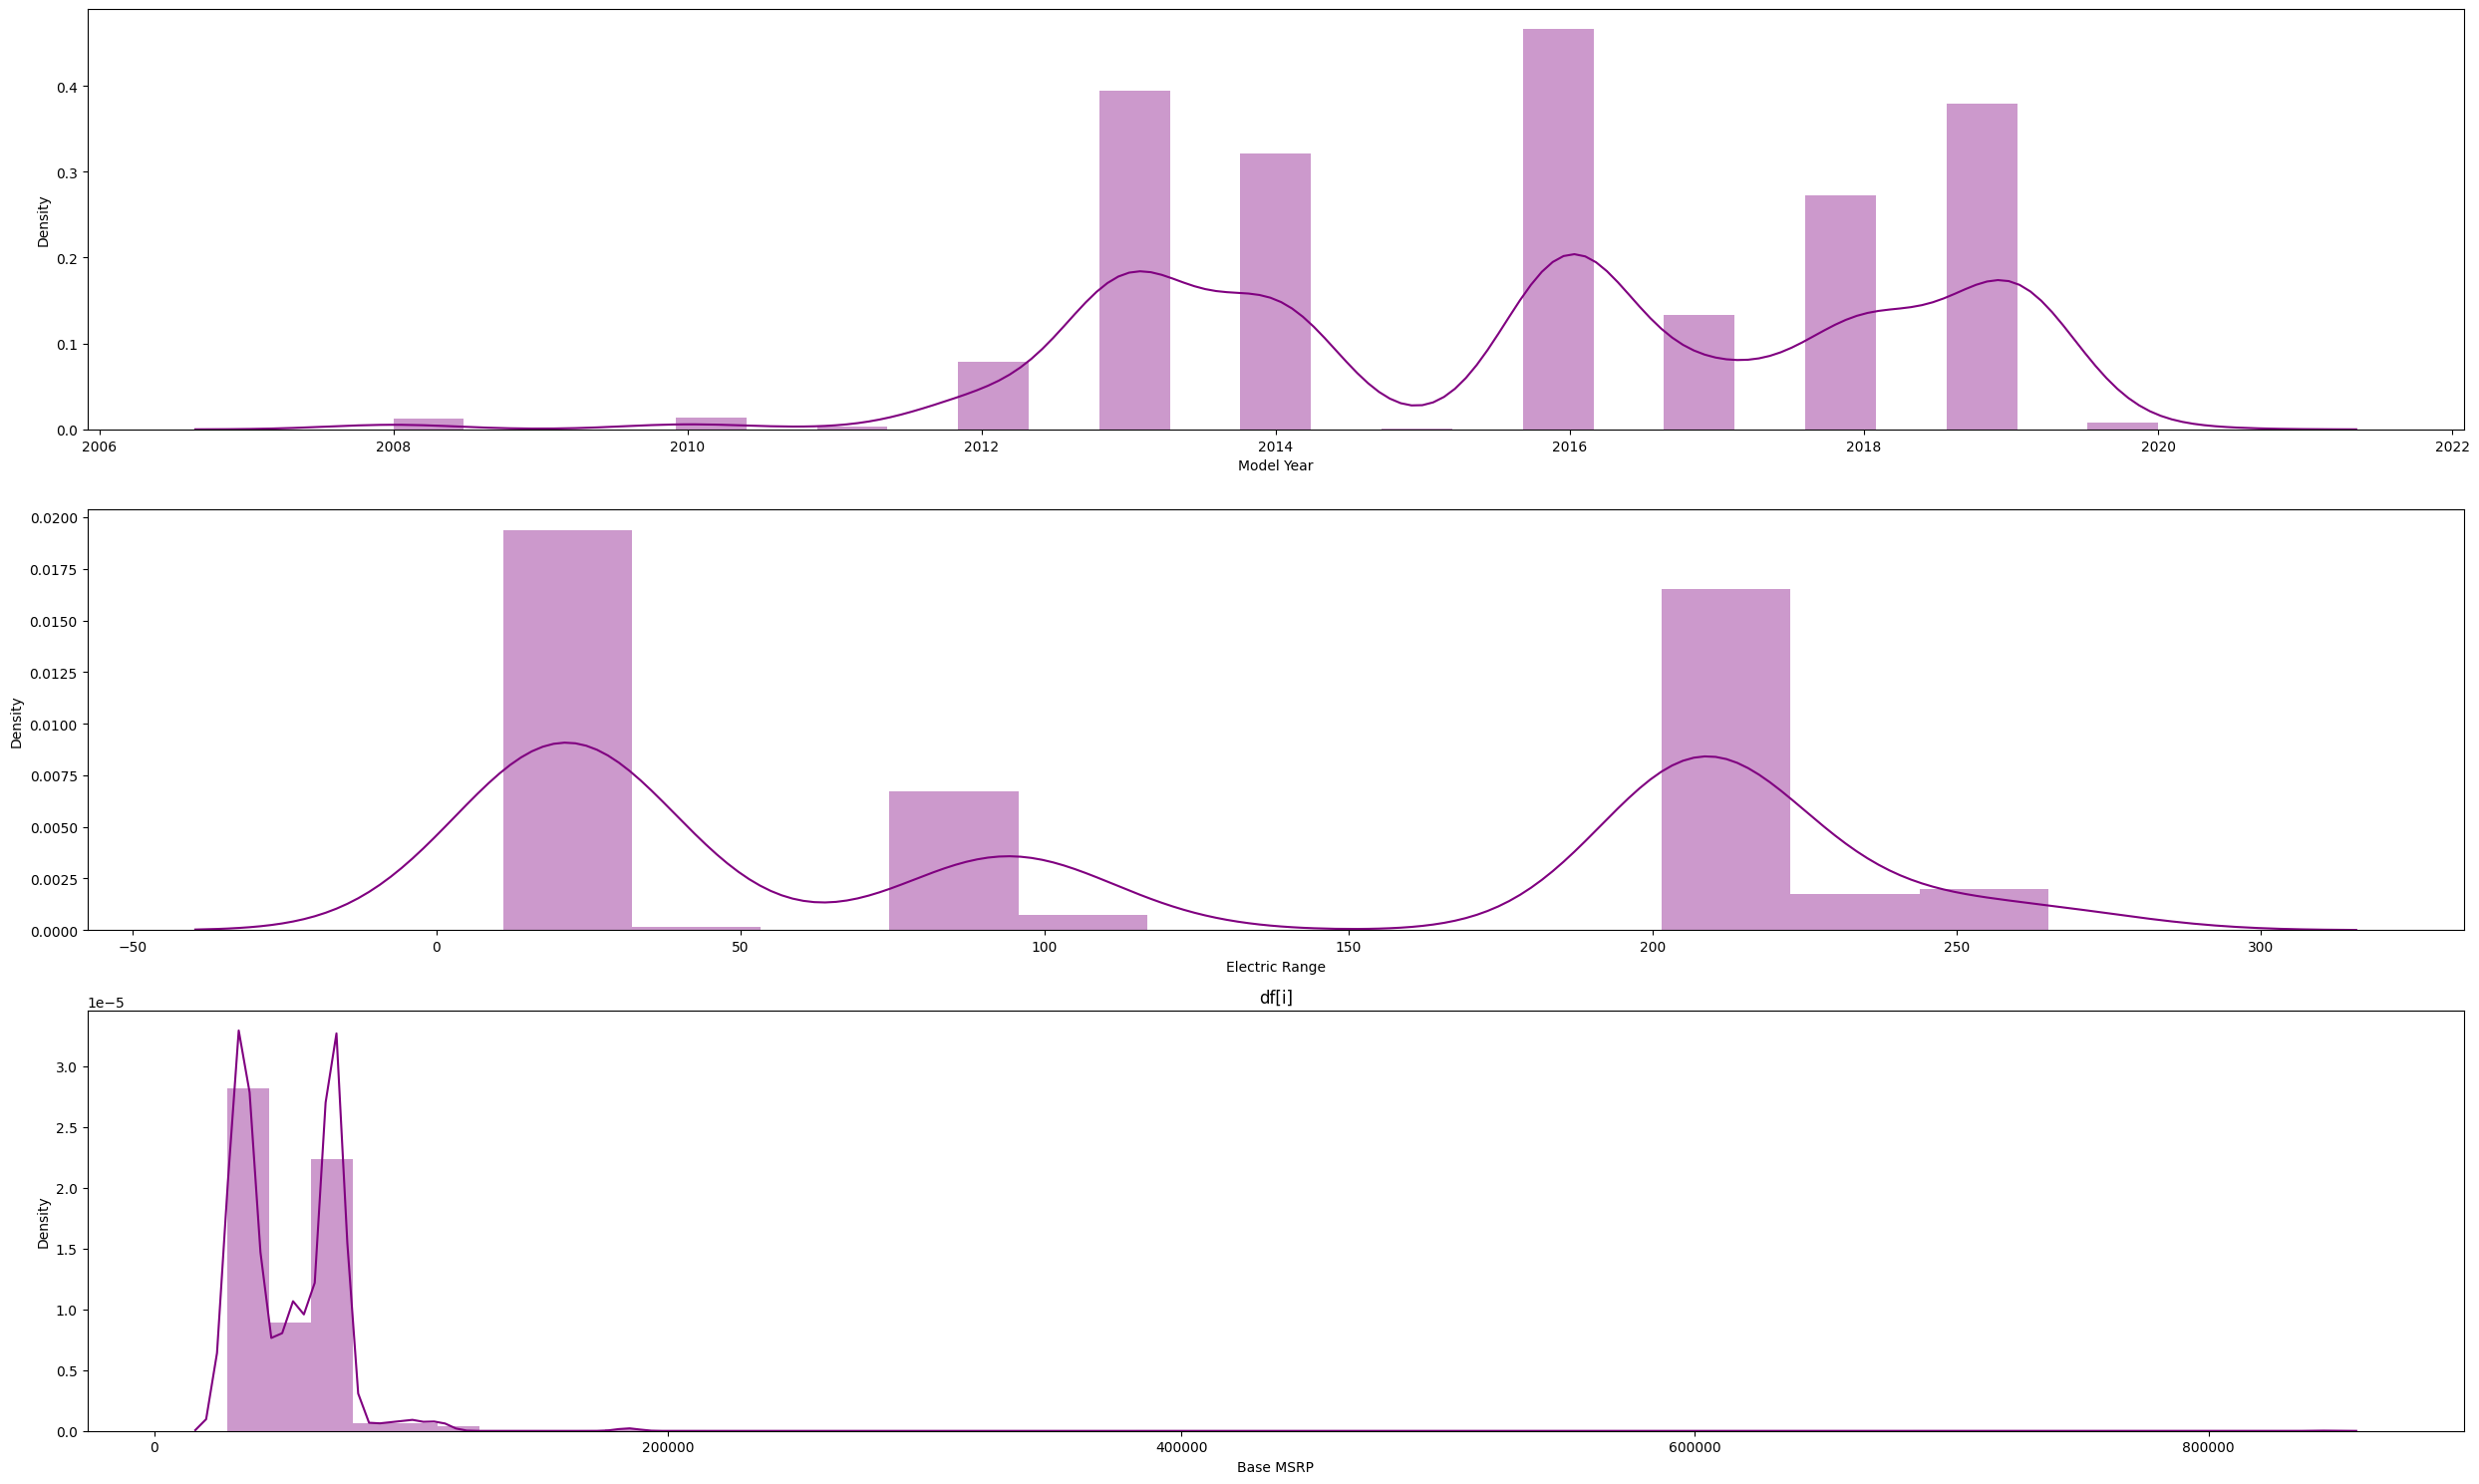

In [21]:
fig, ax= plt.subplots(3,1, figsize=(25,15))

for i, subplot in zip(list(df_num), ax.flatten()):
    sns.distplot(df[i], ax=subplot,kde=True,color='purple')
    plt.title('df[i]')

plt.tight_layout()
plt.show()

In [22]:
from scipy.stats import skew
skewness1 = skew(df['Base MSRP'])
skewness2 = skew(df['Electric Range'])
skewness3 = skew(df['Model Year'])
print(f'Skewness of the column Base MSRP: {skewness1}')
print(f'Skewness of the column Electric Range: {skewness2}')
print(f'Skewness of the column Model Year: {skewness3}')

Skewness of the column Base MSRP: 10.358325940922008
Skewness of the column Electric Range: 0.14248164661221469
Skewness of the column Model Year: -0.21879122007865393


- Based on the above data,the column Base MSRP is right skewed as it values deviates too much from -0.5 to 0.5.
- Other two columns are Electric Range and Model Year are symmetric in nature

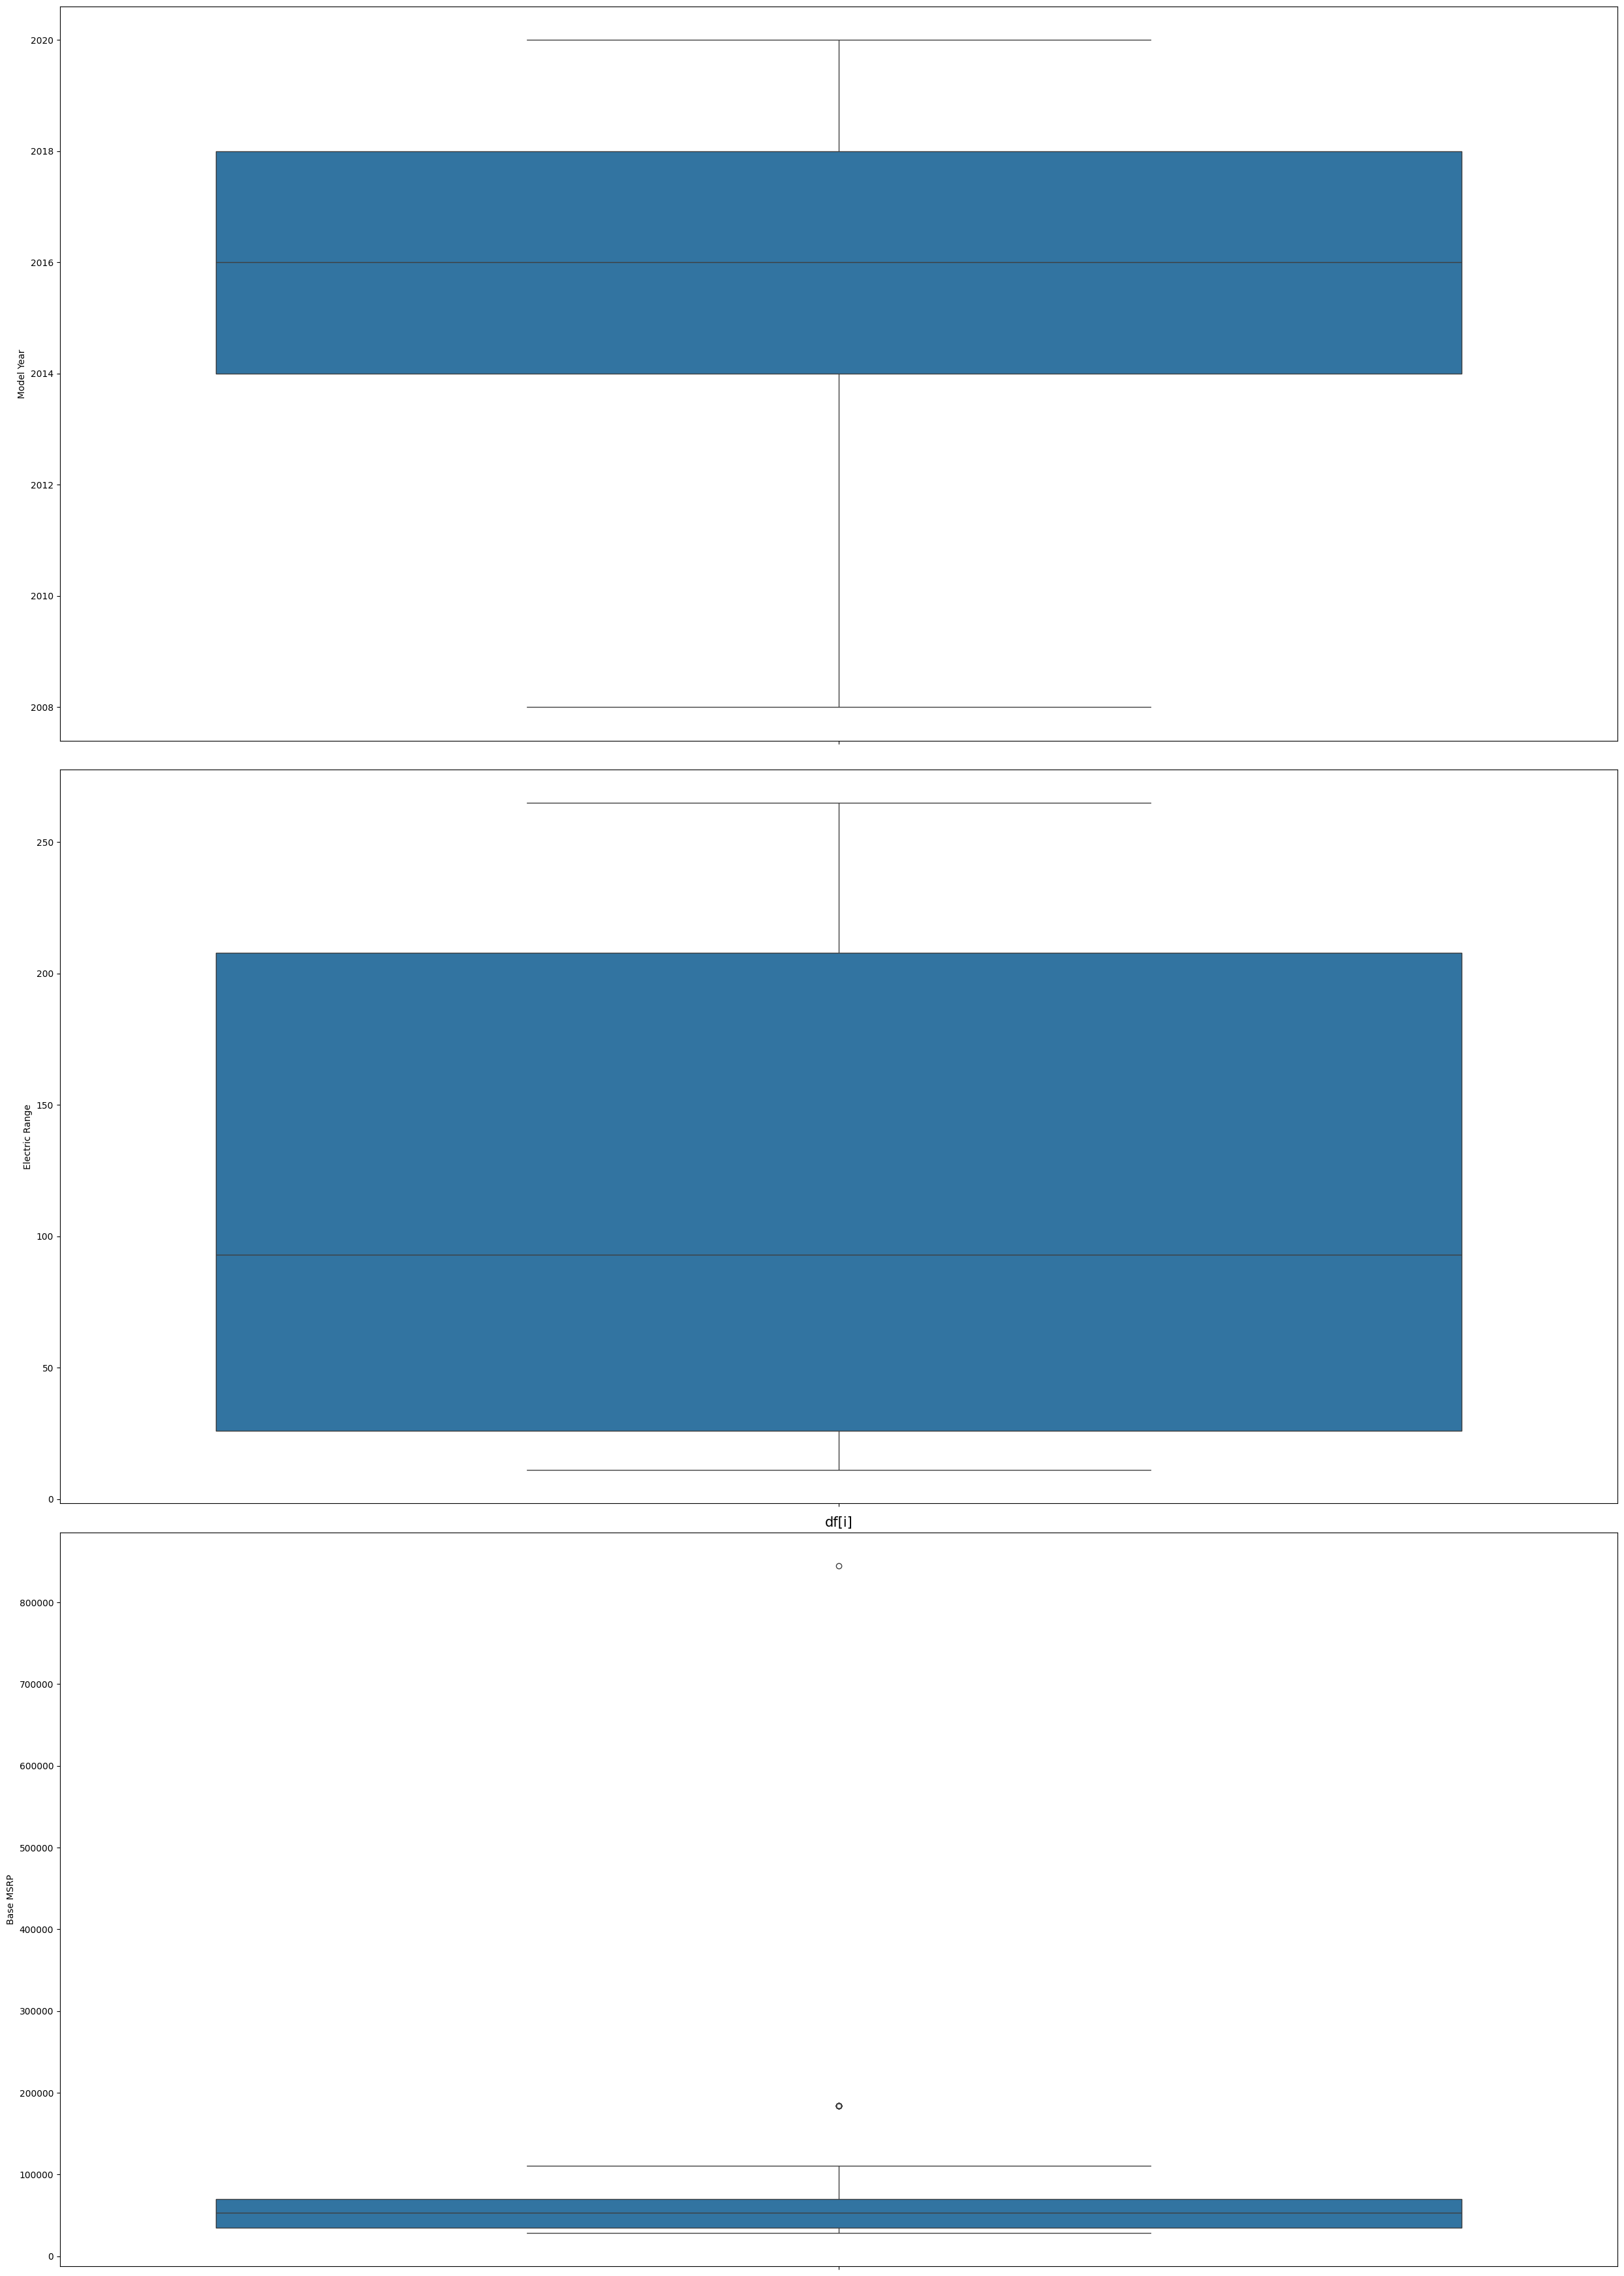

In [23]:
fig, ax= plt.subplots(3,1, figsize=(25,35))

for i, subplot in zip(list(df_num), ax.flatten()):
    sns.boxplot(df[i], ax=subplot)
    plt.title('df[i]', fontsize=15)
    plt.xticks(rotation = 'vertical', fontsize = 15)

plt.tight_layout()
plt.show()

Only column Base MSRP has outliers that to only two positive outliers.

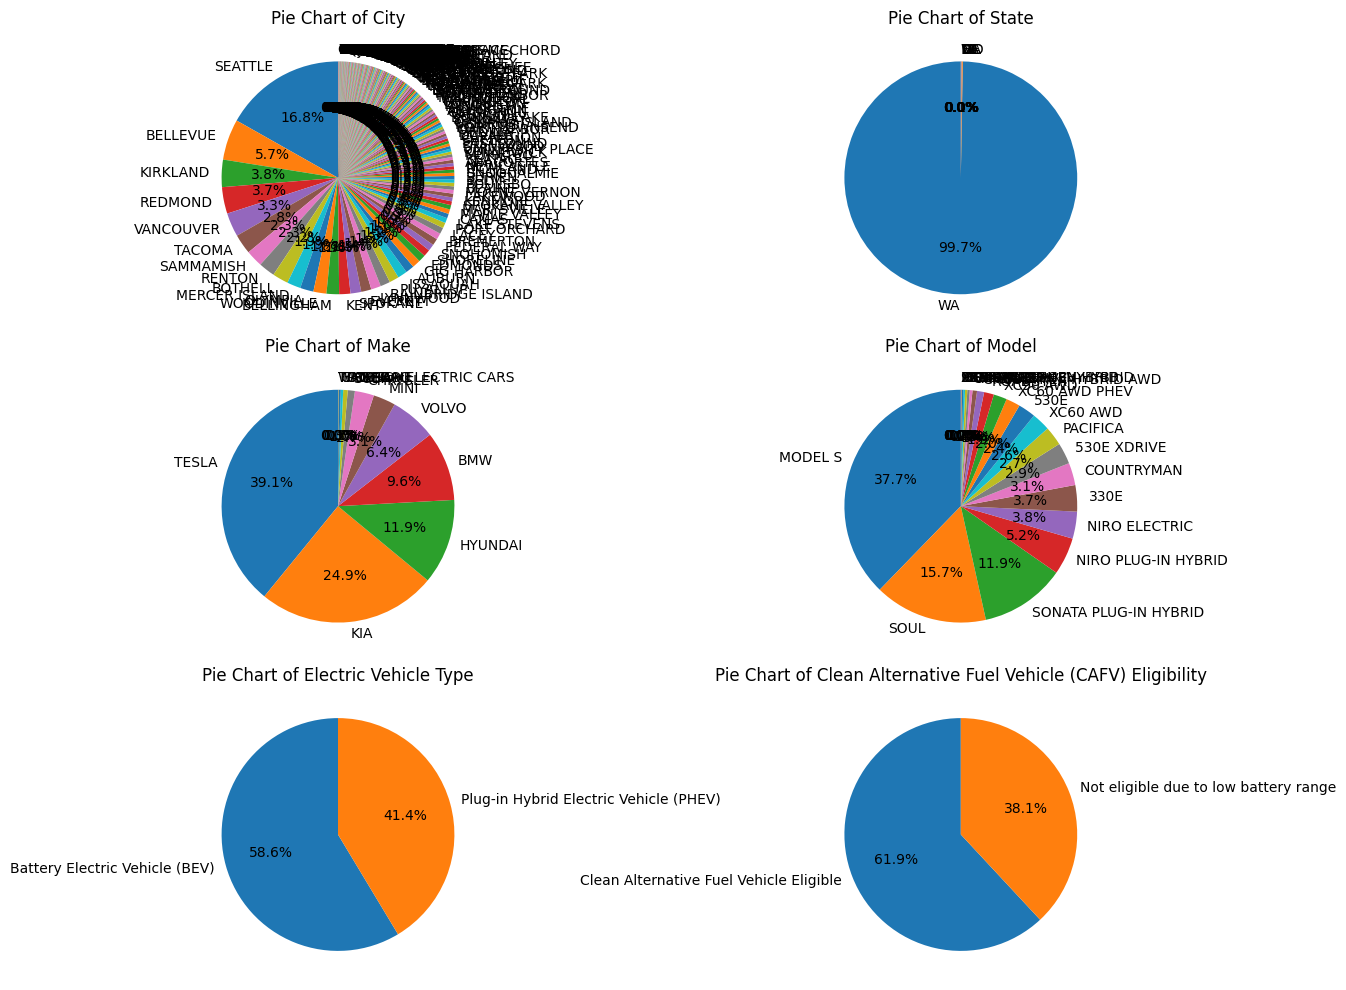

In [24]:
plt.figure(figsize=(12, 10))

for column in df_cat:
    plt.subplot(3, 2, df_cat.get_loc(column) + 1)
    values = df[column].value_counts()
    plt.pie(values, labels=values.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {column}')

plt.tight_layout()
plt.show()


- 1. 57.6% of the vehicle are BEV type and 41.4% of vehicle are of PHEV type
- 2. 61.9% of vehicles are eligible for Clean Alternative Fuel Vehicle
- 3. 37.5% of vehicles are Model S
- 4. A total of 39.1% of cars are of Tesla.
- 5. 99.7% of vehicles are of WA state.

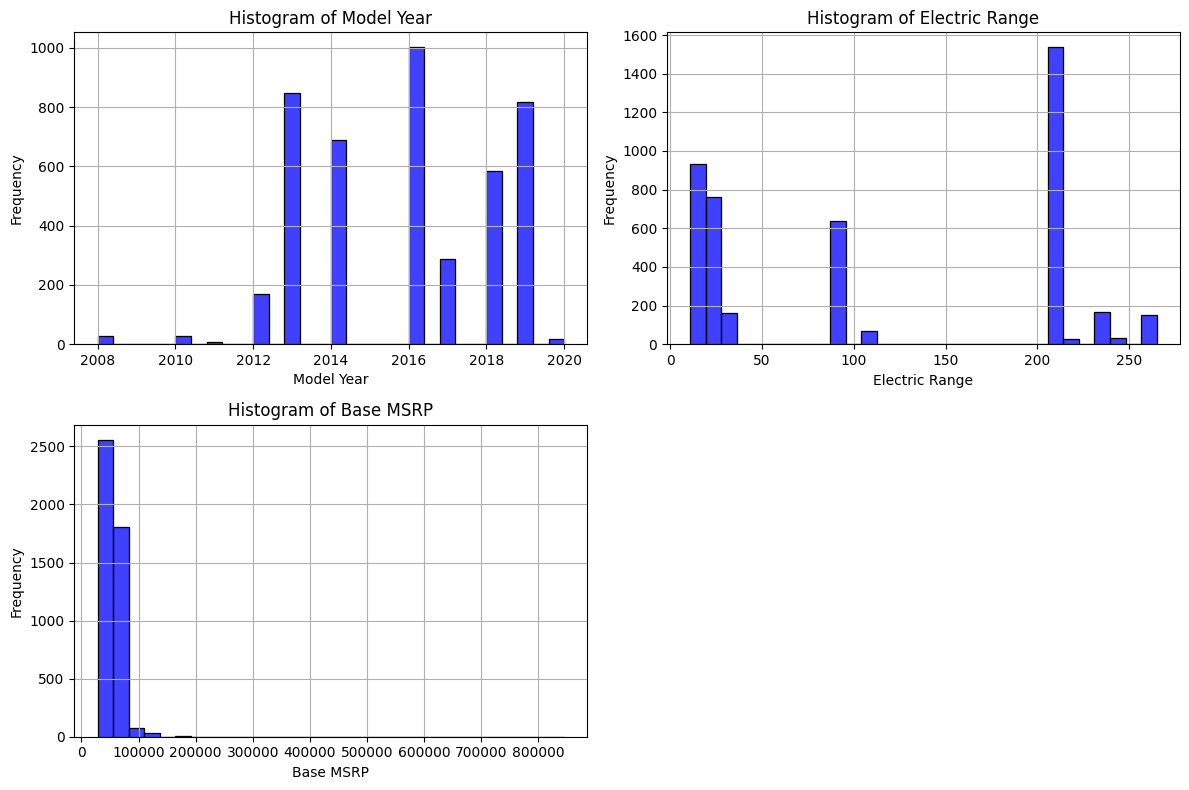

In [25]:
import seaborn as sns

plt.figure(figsize=(12, 8))

for column in df_num:
    plt.subplot(2, 2, df_num.get_loc(column) + 1)
    sns.histplot(df[column], bins=30, kde=False, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


### Count plot for categorical data

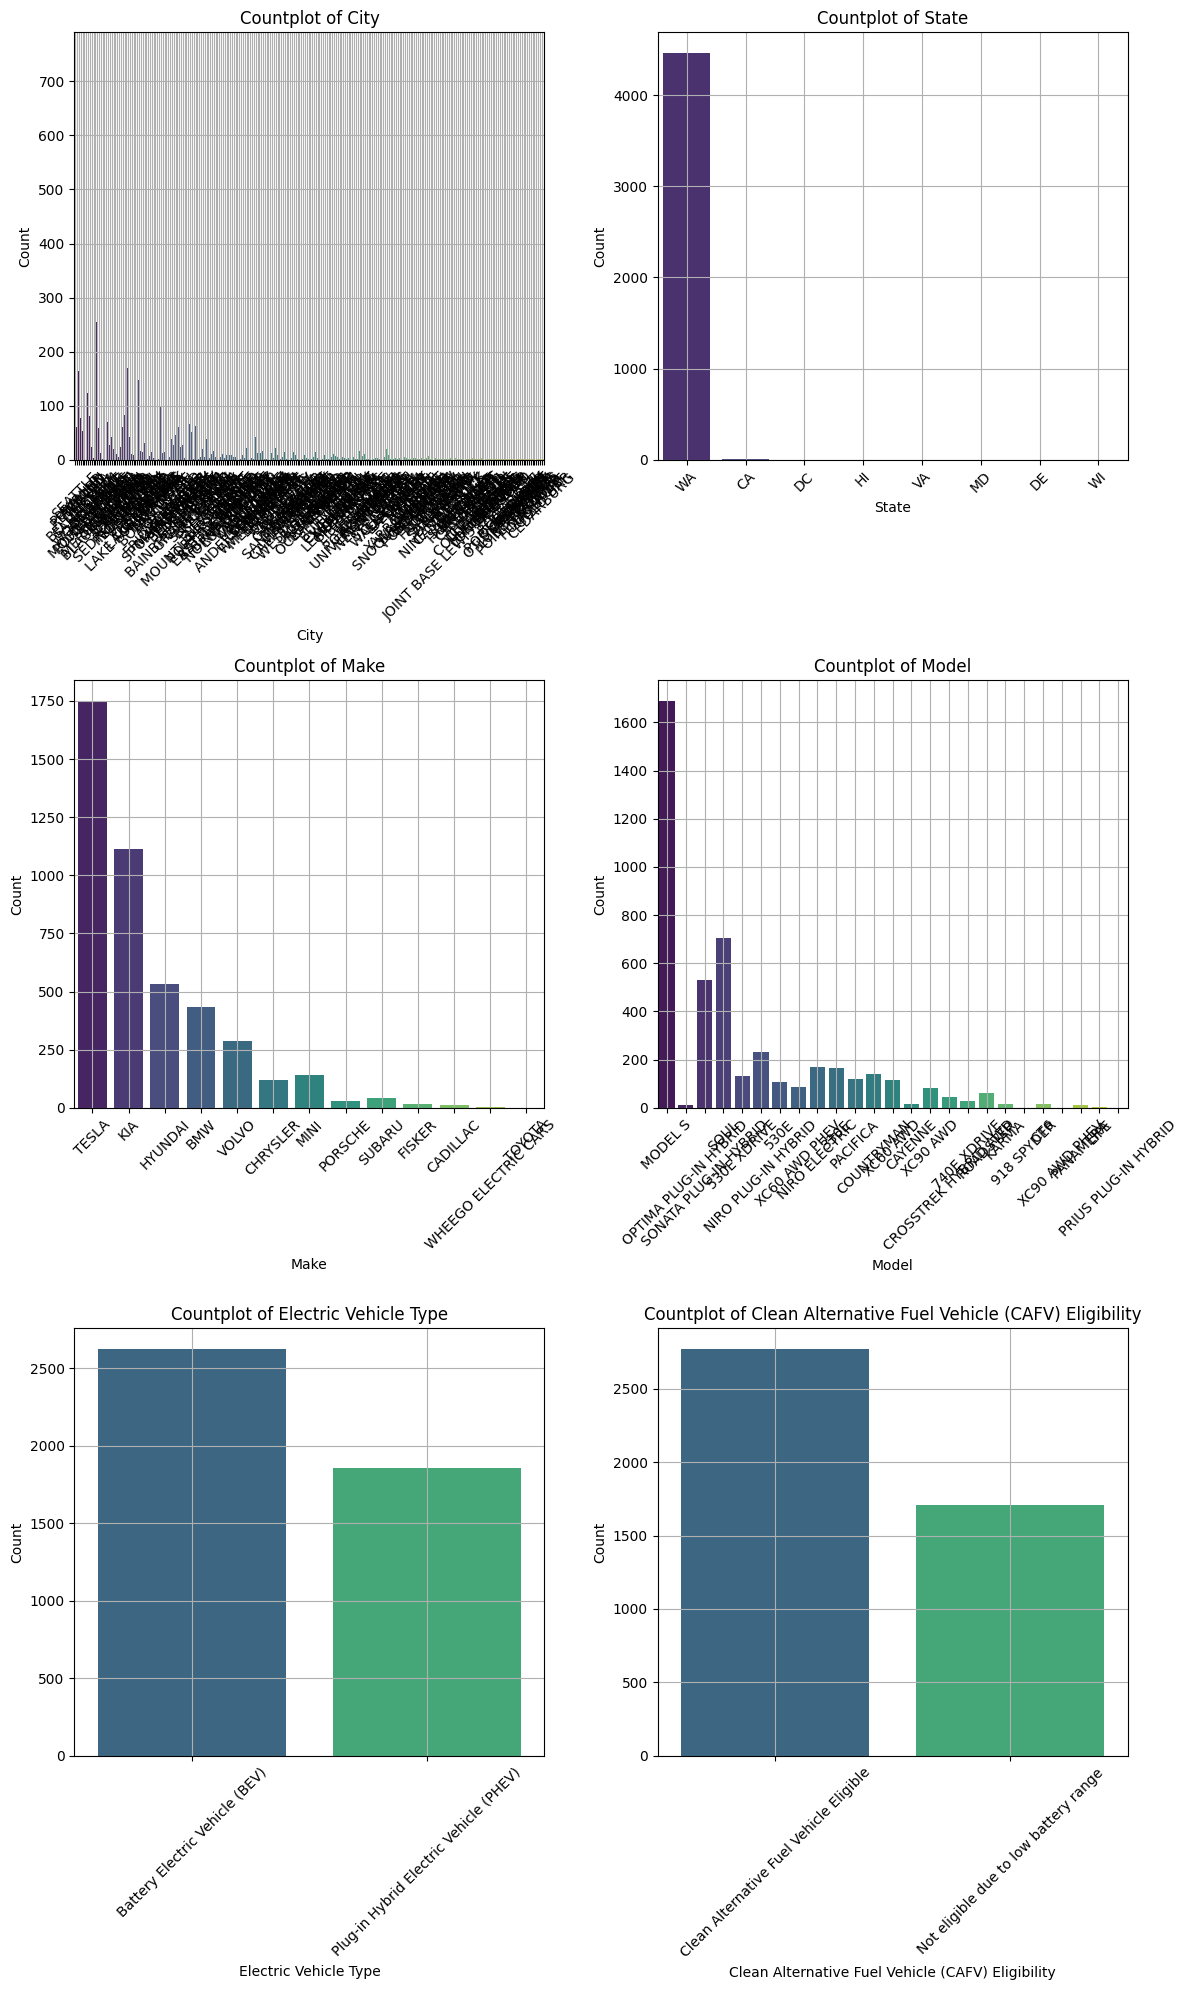

In [26]:
plt.figure(figsize=(12, 20))

for column in df_cat:
    plt.subplot(3, 2, df_cat.get_loc(column) + 1)
    sns.countplot(data=df, x=column, palette='viridis')
    plt.title(f'Countplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)

plt.tight_layout()
plt.show()


- Most of the vehicle are Battery Electric Vehicle.
- More than 2500 vehicles are BEV type and less than 2000 are PHEV type.
- More than 2500 vehicles are of Clean Alternative Fuel Vehicle Eligible type.
- Nearly 1750 vehicles are not eligibe for CAFV due ti low battery range.
- Tesla has most no. of cars around 1750 in the dataset.
- Out of all models Tesla's model S remains the best selling car.
- Most EV cars were sold in state of WA.

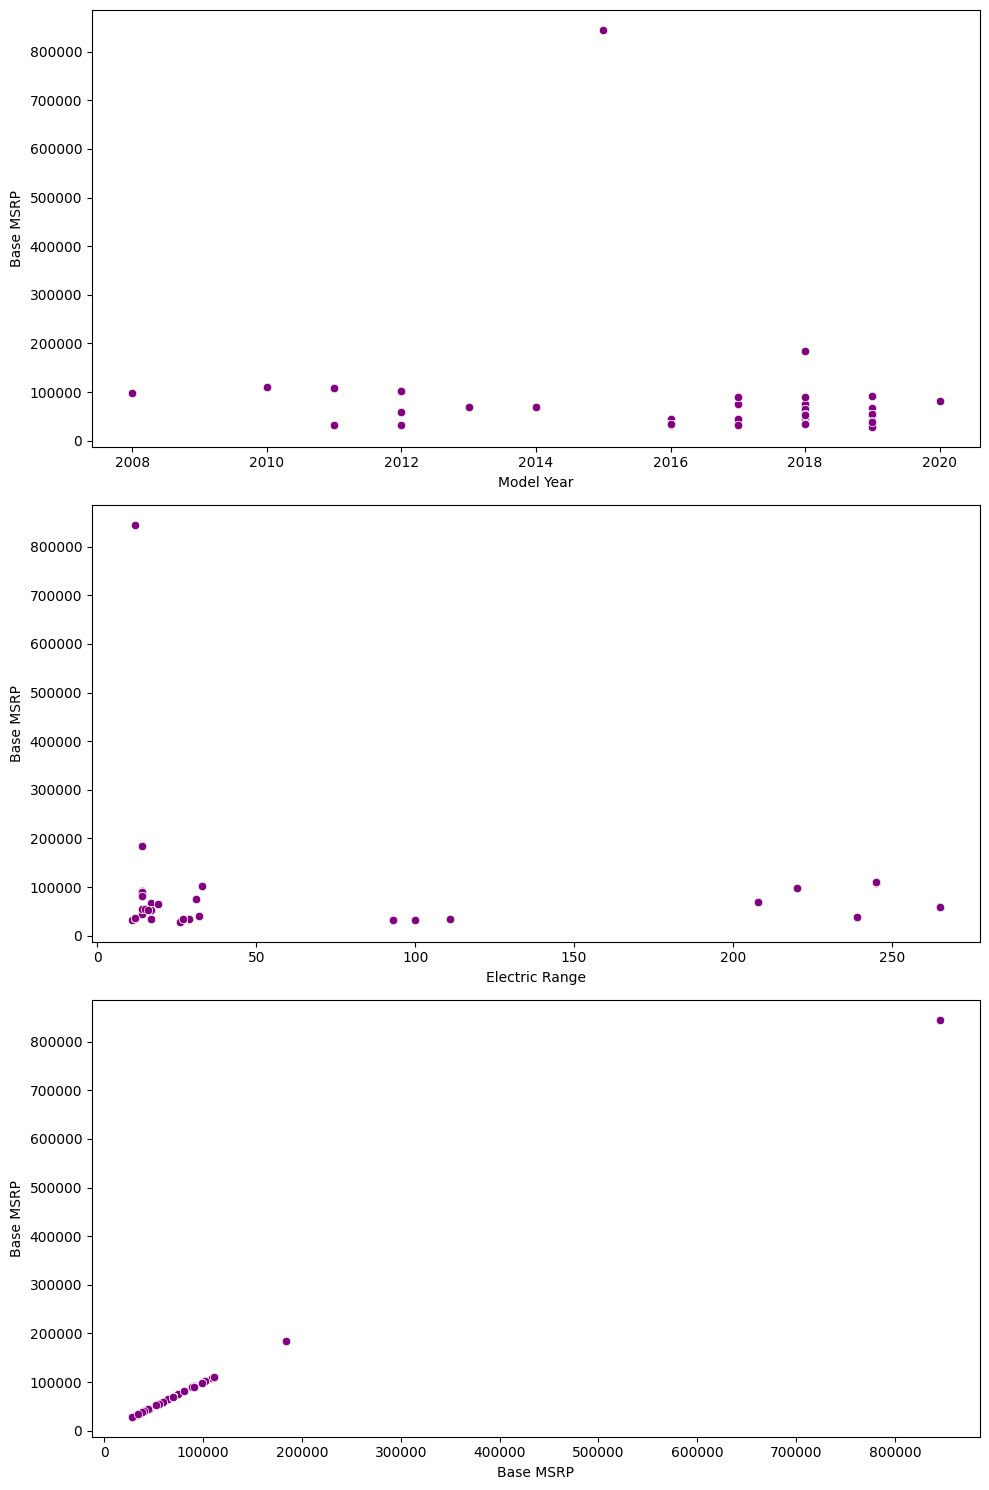

In [27]:
fig, ax= plt.subplots(3,1, figsize=(10,15))

for i, subplot in zip(df_num, ax.flatten()):
    sns.scatterplot(x=df[i],y=df['Base MSRP'], ax=subplot,color='purple')
    

plt.tight_layout()
plt.show()

- A car launched in 2015 is priced highest over 800000 USD and has a range of less than 50 miles.
- Most of the cars are priced below 100000 USD.
- Year 2018 saw the launch of most cars

In [28]:
df.corr()

Model Year  Electric Range  Base MSRP
Model Year        1.000000       -0.756519  -0.542602
Electric Range   -0.756519        1.000000   0.474184
Base MSRP        -0.542602        0.474184   1.000000

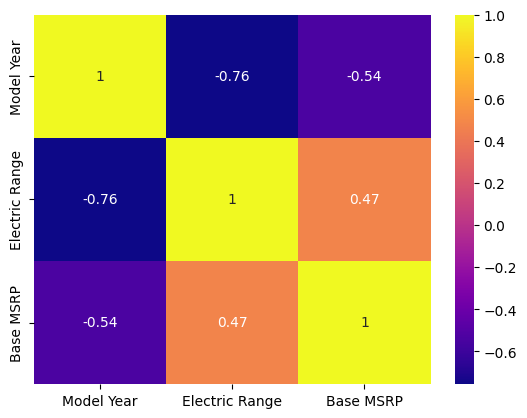

In [29]:
sns.heatmap(df.corr(),annot=True,cmap='plasma')
plt.show()

Electric Range and Model Year columns are highly negatively coorelated

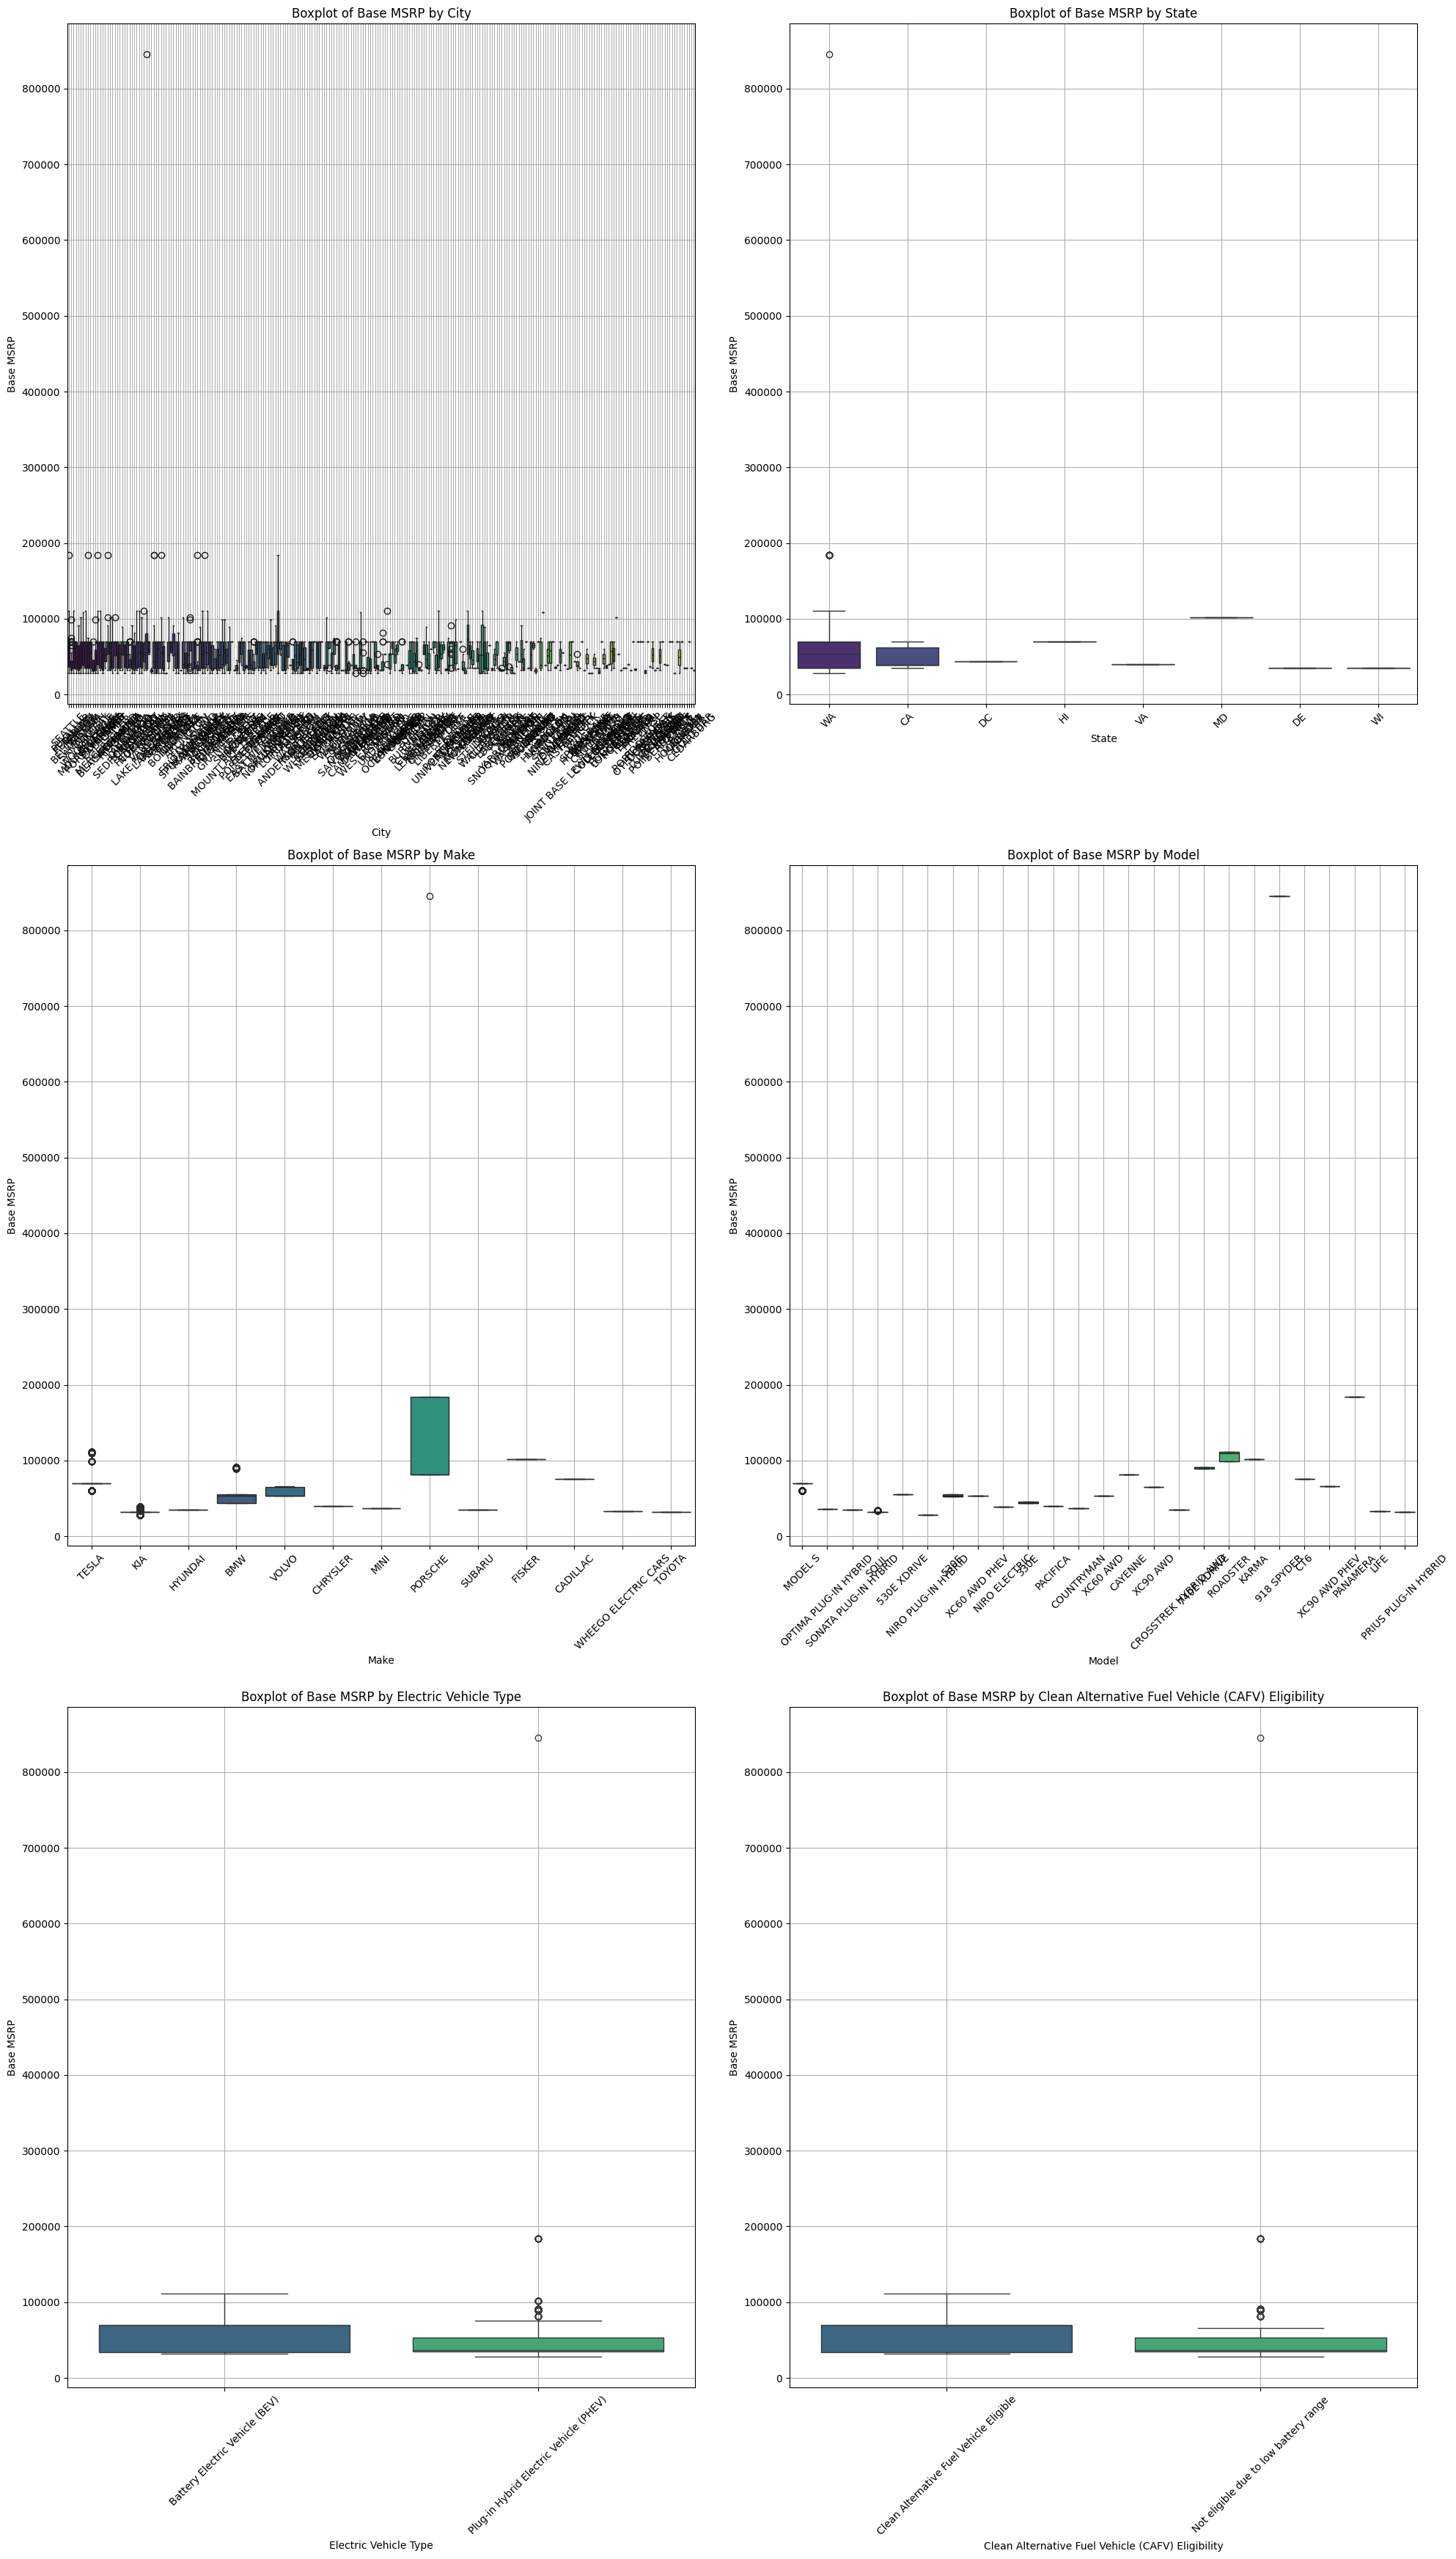

In [30]:
plt.figure(figsize=(20, 35))

for column in df_cat:
    plt.subplot(3, 2, df_cat.get_loc(column) + 1)
    sns.boxplot(data=df, x=df[column], y=df['Base MSRP'], palette='viridis')  # Corrected the x-axis variable
    plt.title(f'Boxplot of Base MSRP by {column}')
    plt.xlabel(column)
    plt.ylabel('Base MSRP')
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()


### Multi Variate Analysis

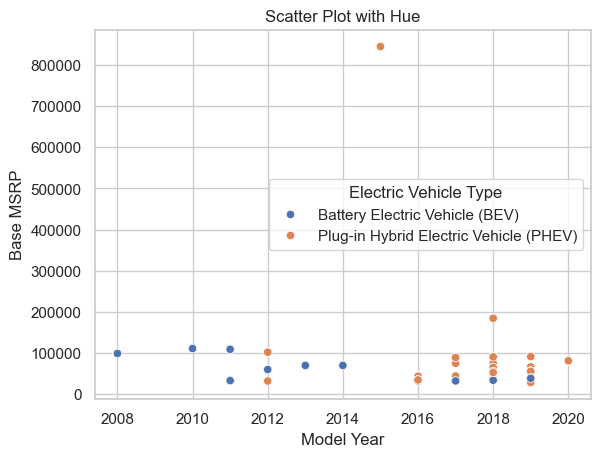

In [31]:
sns.set(style="whitegrid")
sns.scatterplot(x='Model Year', y='Base MSRP', hue=df['Electric Vehicle Type'], data=df)
plt.title('Scatter Plot with Hue')
plt.show()


- Most Plug-in Hybrid Electric vehicles were launched in year 2018

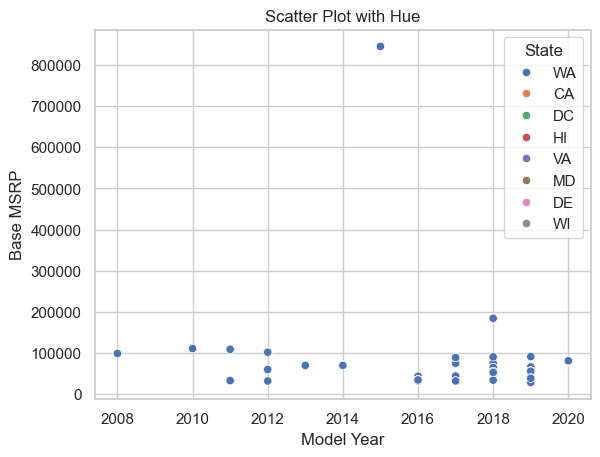

In [32]:
sns.set(style="whitegrid")
sns.scatterplot(x='Model Year', y='Base MSRP', hue=df['State'], data=df)
plt.title('Scatter Plot with Hue')
plt.show()


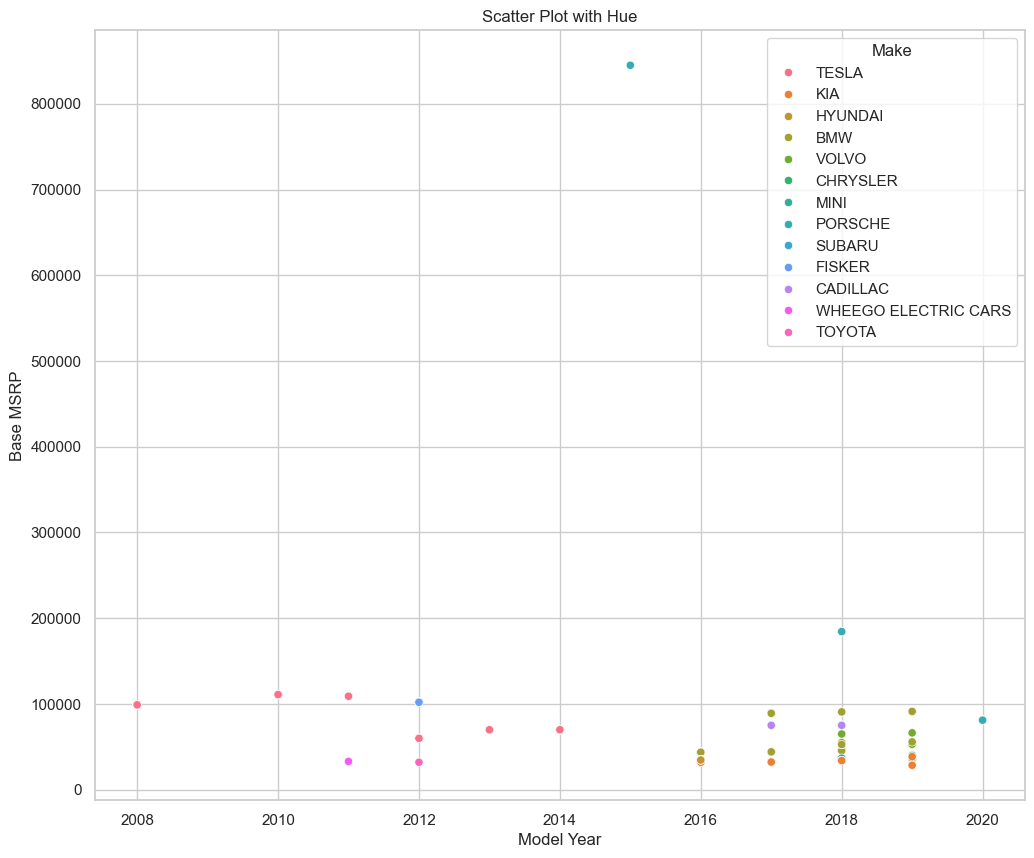

In [33]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")
sns.scatterplot(x='Model Year', y='Base MSRP', hue=df['Make'], data=df)
plt.title('Scatter Plot with Hue')
plt.show()


- In year 2008,the first electric priced at 100000 USD was launched
- In year 2015,The costliest car priced above 800000 USD

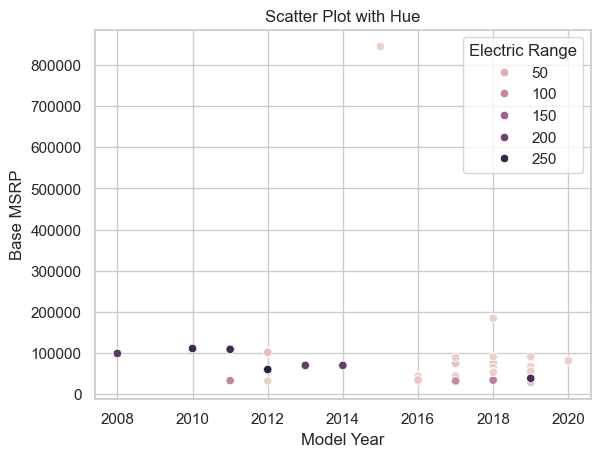

In [34]:
sns.set(style="whitegrid")
sns.scatterplot(x='Model Year', y='Base MSRP', hue=df['Electric Range'], data=df)
plt.title('Scatter Plot with Hue')
plt.show()


- The first car launched in year 2008 was priced at 100000 USD.
- Most of cars sold were priced below 100000 USD

## Outlier Treatment

In [35]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
ul=q3+1.5*iqr #upper limit
ll=q1-1.5*iqr  #lower limit

df_cleaned=df[~((df<(ll))|(df>(ul))).any(axis=1)]
df_cleaned

City State  Model Year     Make                  Model  \
53               SEATTLE    WA        2013    TESLA                MODEL S   
60              PUYALLUP    WA        2019      KIA  OPTIMA PLUG-IN HYBRID   
86               REDMOND    WA        2013    TESLA                MODEL S   
92            BELLINGHAM    WA        2012    TESLA                MODEL S   
112               AUBURN    WA        2012    TESLA                MODEL S   
...                  ...   ...         ...      ...                    ...   
79724  BAINBRIDGE ISLAND    WA        2018      BMW                   530E   
79729             BLAINE    WA        2014    TESLA                MODEL S   
79745             RENTON    WA        2019      KIA          NIRO ELECTRIC   
79750          SNOHOMISH    WA        2016  HYUNDAI  SONATA PLUG-IN HYBRID   
79760            SEATTLE    WA        2013    TESLA                MODEL S   

                        Electric Vehicle Type  \
53             Battery Electric Vehicle (BEV)   
60     Plug-in Hybrid Electric Vehicle (PHEV)   
86             Battery Electric Vehicle (BEV)   
92             Battery Electric Vehicle (BEV)   
112            Battery Electric Vehicle (BEV)   
...                                       ...   
79724  Plug-in Hybrid Electric Vehicle (PHEV)   
79729          Battery Electric Vehicle (BEV)   
79745          Battery Electric Vehicle (BEV)   
79750  Plug-in Hybrid Electric Vehicle (PHEV)   
79760          Battery Electric Vehicle (BEV)   

      Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
53              Clean Alternative Fuel Vehicle Eligible             208   
60                Not eligible due to low battery range              29   
86              Clean Alternative Fuel Vehicle Eligible             208   
92              Clean Alternative Fuel Vehicle Eligible             265   
112             Clean Alternative Fuel Vehicle Eligible             265   
...                                                 ...             ...   
79724             Not eligible due to low battery range              16   
79729           Clean Alternative Fuel Vehicle Eligible             208   
79745           Clean Alternative Fuel Vehicle Eligible             239   
79750             Not eligible due to low battery range              27   
79760           Clean Alternative Fuel Vehicle Eligible             208   

       Base MSRP  
53         69900  
60         35390  
86         69900  
92         59900  
112        59900  
...          ...  
79724      52650  
79729      69900  
79745      38500  
79750      34600  
79760      69900  

[4467 rows x 9 columns]

In [36]:
df_n=df_cleaned

In [37]:
#Shape after outlier treatment
df_n.shape

(4467, 9)

In [38]:
df.shape

(4478, 9)

In [39]:
df_num=df_n.select_dtypes(include=np.number)
df_cat=df_n.select_dtypes(exclude=np.number)

In [40]:
df_num

Model Year  Electric Range  Base MSRP
53           2013             208      69900
60           2019              29      35390
86           2013             208      69900
92           2012             265      59900
112          2012             265      59900
...           ...             ...        ...
79724        2018              16      52650
79729        2014             208      69900
79745        2019             239      38500
79750        2016              27      34600
79760        2013             208      69900

[4467 rows x 3 columns]

### Scaling the data

In [41]:
from sklearn.preprocessing import StandardScaler

# Assuming df_n is your DataFrame
numerical_columns = ['Model Year', 'Electric Range', 'Base MSRP']
df_num1 = df_n[numerical_columns]

# Separate the 'Model Year' column for later concatenation
model_year = df_num['Model Year']
df_num1 = df_num.drop(columns=['Model Year', 'Base MSRP'])  # Exclude the target variable and 'Model Year' column

# Standardize the numerical columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num1)

# Create a DataFrame with the scaled features
df_scaled = pd.DataFrame(X_scaled, columns=df_num1.columns)

# Concatenate the 'Model Year' column to the scaled DataFrame
df_scaled['Model Year'] = model_year.reset_index(drop=True)

df_scaled


Electric Range  Model Year
0           1.007976        2013
1          -0.966353        2019
2           1.007976        2013
3           1.636673        2012
4           1.636673        2012
...              ...         ...
4462       -1.109741        2018
4463        1.007976        2014
4464        1.349899        2019
4465       -0.988413        2016
4466        1.007976        2013

[4467 rows x 2 columns]

In [42]:
df_en= pd.get_dummies(df_cat,drop_first=True)

In [43]:
df_en.head()

City_ALLYN  City_ANACORTES  City_ANDERSON ISLAND  City_ARLINGTON  \
53            0               0                     0               0   
60            0               0                     0               0   
86            0               0                     0               0   
92            0               0                     0               0   
112           0               0                     0               0   

     City_ASOTIN  City_AUBURN  City_BAINBRIDGE ISLAND  City_BATTLE GROUND  \
53             0            0                       0                   0   
60             0            0                       0                   0   
86             0            0                       0                   0   
92             0            0                       0                   0   
112            0            1                       0                   0   

     City_BEAUX ARTS  City_BELFAIR  ...  Model_PRIUS PLUG-IN HYBRID  \
53                 0             0  ...                           0   
60                 0             0  ...                           0   
86                 0             0  ...                           0   
92                 0             0  ...                           0   
112                0             0  ...                           0   

     Model_ROADSTER  Model_SONATA PLUG-IN HYBRID  Model_SOUL  Model_XC60 AWD  \
53                0                            0           0               0   
60                0                            0           0               0   
86                0                            0           0               0   
92                0                            0           0               0   
112               0                            0           0               0   

     Model_XC60 AWD PHEV  Model_XC90 AWD  Model_XC90 AWD PHEV  \
53                     0               0                    0   
60                     0               0                    0   
86                     0               0                    0   
92                     0               0                    0   
112                    0               0                    0   

     Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV)  \
53                                                   0              
60                                                   1              
86                                                   0              
92                                                   0              
112                                                  0              

     Clean Alternative Fuel Vehicle (CAFV) Eligibility_Not eligible due to low battery range  
53                                                   0                                        
60                                                   1                                        
86                                                   0                                        
92                                                   0                                        
112                                                  0                                        

[5 rows x 300 columns]

In [44]:
df_scaled.reset_index(drop=True, inplace=True)
df_en.reset_index(drop=True, inplace=True)


In [45]:
df_f=pd.concat([df_scaled,df_en],axis=1)
df_f

Electric Range  Model Year  City_ALLYN  City_ANACORTES  \
0           1.007976        2013           0               0   
1          -0.966353        2019           0               0   
2           1.007976        2013           0               0   
3           1.636673        2012           0               0   
4           1.636673        2012           0               0   
...              ...         ...         ...             ...   
4462       -1.109741        2018           0               0   
4463        1.007976        2014           0               0   
4464        1.349899        2019           0               0   
4465       -0.988413        2016           0               0   
4466        1.007976        2013           0               0   

      City_ANDERSON ISLAND  City_ARLINGTON  City_ASOTIN  City_AUBURN  \
0                        0               0            0            0   
1                        0               0            0            0   
2                        0               0            0            0   
3                        0               0            0            0   
4                        0               0            0            1   
...                    ...             ...          ...          ...   
4462                     0               0            0            0   
4463                     0               0            0            0   
4464                     0               0            0            0   
4465                     0               0            0            0   
4466                     0               0            0            0   

      City_BAINBRIDGE ISLAND  City_BATTLE GROUND  ...  \
0                          0                   0  ...   
1                          0                   0  ...   
2                          0                   0  ...   
3                          0                   0  ...   
4                          0                   0  ...   
...                      ...                 ...  ...   
4462                       1                   0  ...   
4463                       0                   0  ...   
4464                       0                   0  ...   
4465                       0                   0  ...   
4466                       0                   0  ...   

      Model_PRIUS PLUG-IN HYBRID  Model_ROADSTER  Model_SONATA PLUG-IN HYBRID  \
0                              0               0                            0   
1                              0               0                            0   
2                              0               0                            0   
3                              0               0                            0   
4                              0               0                            0   
...                          ...             ...                          ...   
4462                           0               0                            0   
4463                           0               0                            0   
4464                           0               0                            0   
4465                           0               0                            1   
4466                           0               0                            0   

      Model_SOUL  Model_XC60 AWD  Model_XC60 AWD PHEV  Model_XC90 AWD  \
0              0               0                    0               0   
1              0               0                    0               0   
2              0               0                    0               0   
3              0               0                    0               0   
4              0               0                    0               0   
...          ...             ...                  ...             ...   
4462           0               0                    0               0   
4463           0               0                    0               0   
4464           0               0                    0    

# Modelling

In [46]:
#Step 1:Separate x and y
X = df_f.drop(columns=['Electric Range'])
y=df_num['Base MSRP']

In [47]:
#Step 2: Split the data in train and test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3126, 301)
(1341, 301)
(3126,)
(1341,)


In [49]:
#Step 3:Calling the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lr=LinearRegression()

#Step 4: Fit the model
model_lr=lr.fit(X_train,y_train)

#Step 5:Use Prediction
pred_train=model_lr.predict(X_train)
pred_test=model_lr.predict(X_test)

r2_train=r2_score(y_train,pred_train)
r2_test=r2_score(y_test,pred_test)

print("R2 Train: ",r2_train)
print("R2 Test: ",r2_test)

#Step 6:Model Performance of model
print("MSE Train: ",mean_squared_error(y_train,pred_train))
print("MSE Test: ",mean_squared_error(y_test,pred_test))

print("RMSE Train: ",np.sqrt(mean_squared_error(y_train,pred_train)))
print("RMSE Test: ",np.sqrt(mean_squared_error(y_test,pred_test)))


R2 Train:  0.9936806538339503
R2 Test:  -1.2065987725565532e+19
MSE Train:  2046940.467490403
MSE Test:  4.0734043546859425e+27
RMSE Train:  1430.7132722842837
RMSE Test:  63823227391647.49


- Based on above scores,linear regression is not performing well

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
#doing the RF with original data with all features
rfo=RandomForestRegressor()

# build the model and find the r2score with RMSE

rfo = rfo.fit(X_train,y_train)

pred_train_rfo = rfo.predict(X_train)

pred_test_rfo=rfo.predict(X_test)

In [52]:
r2_train=r2_score(y_train,pred_train_rfo)
r2_test=r2_score(y_test,pred_test_rfo)

print("R2 Train: ",r2_train)
print("R2 Test: ",r2_test)
# Mean Squared Error
# print("MSE Train :", mean_squared_error(ytrain,pred_train_rf))
# print("MSE Test  :", mean_squared_error(ytest,pred_test_rf))


print("RMSE Train :", np.sqrt(mean_squared_error(y_train,
                                                 pred_train_rfo)))

print("RMSE Test  :", np.sqrt(mean_squared_error(y_test,
                                                 pred_test_rfo)))

R2 Train:  0.9994839757302505
R2 Test:  0.9914060532784805
RMSE Train : 408.83832175891416
RMSE Test  : 1703.3098211974948


- Based on R2 score ,it can be seen that model is learning as well as performing well on seen and unseen data.

# Grid Search CV

In [53]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

CPU times: total: 10min 22s
Wall time: 20min 53s


In [54]:
print(best_rf)

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=300)


In [55]:
%%time
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor with the best hyperparameters
best_rf = RandomForestRegressor(n_estimators=300,max_features='sqrt',bootstrap=False)

# Fit the model to your training data
best_rf.fit(X_train, y_train)

# Make predictions
pred_train_rf = best_rf.predict(X_train)
pred_test_rf = best_rf.predict(X_test)

# Evaluate the model with R-squared and RMSE
r2_train = r2_score(y_train, pred_train_rf)
r2_test = r2_score(y_test, pred_test_rf)

print("R2 Train:", r2_train)
print("R2 Test:", r2_test)

rmse_train = np.sqrt(mean_squared_error(y_train, pred_train_rf))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test_rf))

print("RMSE Train:", rmse_train)
print("RMSE Test:", rmse_test)


R2 Train: 0.9999824982707799
R2 Test: 0.9967416639075273
RMSE Train: 75.29341806518214
RMSE Test: 1048.806237718127
CPU times: total: 1.41 s
Wall time: 2.29 s


- The R2 scores are very close to 1, indicating that the model explains the variance in the target variable extremely well, both on the training and test sets.
- The Root Mean Squared Error (RMSE) values are low, especially on the training set, suggesting that the model's predictions are close to the actual values. The RMSE on the test set is also reasonable, given the scale of the target variable.

- The model generalizes well to unseen data, as evidenced by the minimal difference between the training and test set performance.
- The R2 scores indicate that the model captures almost all the variability in the target variable.
- The RMSE values, particularly on the training set, are low, indicating good predictive accuracy.

# 2nd Dataset- EV Stats-1.csv

In [56]:
df=pd.read_csv('EV Stats-1.csv')
df.head()

Sl. No           State  \
0      1  Andhra Pradesh   
1      2           Assam   
2      3           Bihar   
3      4    Chhattisgarh   
4      5           Delhi   

   Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  \
0                                              431.0                    
1                                              463.0                    
2                                              252.0                    
3                                              613.0                    
4                                             1395.0                    

   Two Wheelers (Category L2 (CMVR))  \
0                              692.0   
1                              138.0   
2                              430.0   
3                              382.0   
4                              251.0   

   Two Wheelers (Max power not exceeding 250 Watts)  \
0                                            4689.0   
1                                            1006.0   
2                                            2148.0   
3                                            2078.0   
4                                            5018.0   

  Three Wheelers (Category L5 slow speed as per CMVR)  \
0                                                  0    
1                                                  0    
2                                                  6    
3                                                 58    
4                                                  0    

   Three Wheelers (Category L5 as per CMVR)  \
0                                       0.0   
1                                     117.0   
2                                      64.0   
3                                     106.0   
4                                       1.0   

   Passenger Cars (Category M1 as per CMVR)  Buses  Total in state  
0                                    3680.0    0.0          9492.0  
1                                     151.0    0.0          1875.0  
2                                     271.0    0.0          3171.0  
3                                     997.0    0.0          4234.0  
4                                   12695.0   21.0         19381.0

In [57]:
#checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Sl. No                                                              34 non-null     object 
 1   State                                                               34 non-null     object 
 2   Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  31 non-null     float64
 3   Two Wheelers (Category L2 (CMVR))                                   31 non-null     float64
 4   Two Wheelers (Max power not exceeding 250 Watts)                    31 non-null     float64
 5   Three Wheelers (Category L5 slow speed as per CMVR)                 34 non-null     object 
 6   Three Wheelers (Category L5 as per CMVR)                            31 non-null     float64
 7   Passenger Cars (Cat

There are 7 numerical and 3 categorical columns

In [58]:
#Shape of data
df.shape

(35, 10)

There are 35 rows and 10 columns

In [59]:
#Checking the null values
df.isnull().sum()

Sl. No                                                                1
State                                                                 1
Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules    4
Two Wheelers (Category L2 (CMVR))                                     4
Two Wheelers (Max power not exceeding 250 Watts)                      4
Three Wheelers (Category L5 slow speed as per CMVR)                   1
Three Wheelers (Category L5 as per CMVR)                              4
Passenger Cars (Category M1 as per CMVR)                              4
Buses                                                                 4
Total in state                                                        4
dtype: int64

There is a presence of Null values

In [60]:
df.head(50)

Sl. No                                              State  \
0            1                                     Andhra Pradesh   
1            2                                              Assam   
2            3                                              Bihar   
3            4                                       Chhattisgarh   
4            5                                              Delhi   
5            6                                                Goa   
6            7                                            Gujarat   
7            8                                            Haryana   
8            9                                   Himachal Pradesh   
9           10                                    Jammu & Kashmir   
10          11                                          Jharkhand   
11          12                                          Karnataka   
12          13                                             Kerala   
13          14                                     Madhya Pradesh   
14          15                                        Maharashtra   
15          16                                            Manipur   
16          17                                          Meghalaya   
17          18                                           Nagaland   
18          19                                             Odisha   
19          20                                             Punjab   
20          21                                          Rajasthan   
21          22                                         Tamil Nadu   
22          23                                          Telangana   
23          24                                            Tripura   
24          25                                      Uttar Pradesh   
25          26                                         Uttarkhand   
26          27                                        West Bengal   
27          28                          Andaman & Nicobar islands   
28          29                                         Chandigarh   
29          30                             Dadra and Nagar Haveli   
30          31                                              Total   
31         NaN                                                NaN   
32      Source     Electric Vehicles Sales report in india - 2018   
33  Additional  Sales of electric vehicles across India from f...   
34  Additional  Reasons for preferring an electric car over a ...   

    Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  \
0                                               431.0                    
1                                               463.0                    
2                                               252.0                    
3                                               613.0                    
4                                              1395.0                    
5                                                 0.0                    
6                                              7182.0                    
7                                              3162.0                    
8                                                 0.0                    
9                                                 2.0                    
10                                               75.0                    
11                                              784.0                    
12                                              432.0                    
13                                              503.0                    
14                                             2630.0                    
15                                               16.0                    
16                                                0.0                    
17                                                0.0                    
18                                              377.0                    
19                                         

In [61]:
#Based on the obeservation of the data.We need to drop rows from 31 to 35
df=df[:31]

In [62]:
#Checking the null values
df.isnull().sum()

Sl. No                                                                0
State                                                                 0
Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules    0
Two Wheelers (Category L2 (CMVR))                                     0
Two Wheelers (Max power not exceeding 250 Watts)                      0
Three Wheelers (Category L5 slow speed as per CMVR)                   0
Three Wheelers (Category L5 as per CMVR)                              0
Passenger Cars (Category M1 as per CMVR)                              0
Buses                                                                 0
Total in state                                                        0
dtype: int64

There are no null values present

# Exploratory Data Analysis

In [63]:
df.head(50)

Sl. No                      State  \
0       1             Andhra Pradesh   
1       2                      Assam   
2       3                      Bihar   
3       4               Chhattisgarh   
4       5                      Delhi   
5       6                        Goa   
6       7                    Gujarat   
7       8                    Haryana   
8       9           Himachal Pradesh   
9      10            Jammu & Kashmir   
10     11                  Jharkhand   
11     12                  Karnataka   
12     13                     Kerala   
13     14             Madhya Pradesh   
14     15                Maharashtra   
15     16                    Manipur   
16     17                  Meghalaya   
17     18                   Nagaland   
18     19                     Odisha   
19     20                     Punjab   
20     21                  Rajasthan   
21     22                 Tamil Nadu   
22     23                  Telangana   
23     24                    Tripura   
24     25              Uttar Pradesh   
25     26                 Uttarkhand   
26     27                West Bengal   
27     28  Andaman & Nicobar islands   
28     29                 Chandigarh   
29     30     Dadra and Nagar Haveli   
30     31                      Total   

    Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  \
0                                               431.0                    
1                                               463.0                    
2                                               252.0                    
3                                               613.0                    
4                                              1395.0                    
5                                                 0.0                    
6                                              7182.0                    
7                                              3162.0                    
8                                                 0.0                    
9                                                 2.0                    
10                                               75.0                    
11                                              784.0                    
12                                              432.0                    
13                                              503.0                    
14                                             2630.0                    
15                                               16.0                    
16                                                0.0                    
17                                                0.0                    
18                                              377.0                    
19                                              698.0                    
20                                             2036.0                    
21                                              491.0                    
22                                              535.0                    
23                                               28.0                    
24                                             2954.0                    
25                                              423.0                    
26                                             1451.0                    
27                                                0.0                    
28                                              612.0                    
29                                                4.0                    
30                                            27549.0                    

    Two Wheelers (Category L2 (CMVR))  \
0                               692.0   
1                               138.0   
2                               430.0   
3                               382.0   
4                               251.0   
5                                 0.0   
6                               217.0   
7                        

In [64]:
df['Three Wheelers (Category L5 slow speed as per CMVR)'] = df['Three Wheelers (Category L5 slow speed as per CMVR)'].astype(float)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Sl. No                                                              31 non-null     object 
 1   State                                                               31 non-null     object 
 2   Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  31 non-null     float64
 3   Two Wheelers (Category L2 (CMVR))                                   31 non-null     float64
 4   Two Wheelers (Max power not exceeding 250 Watts)                    31 non-null     float64
 5   Three Wheelers (Category L5 slow speed as per CMVR)                 31 non-null     float64
 6   Three Wheelers (Category L5 as per CMVR)                            31 non-null     float64
 7   Passenger Cars (Cat

In [66]:
df_num=df.select_dtypes(include=np.number)
df_num.columns

Index(['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
       'Two Wheelers (Category L2 (CMVR))',
       'Two Wheelers (Max power not exceeding 250 Watts)',
       'Three Wheelers (Category L5 slow speed as per CMVR)',
       'Three Wheelers (Category L5 as per CMVR)',
       'Passenger Cars (Category M1 as per CMVR)', 'Buses', 'Total in state'],
      dtype='object')

In [67]:
df_cat=df.select_dtypes(exclude=np.number)
df_cat.columns

Index(['Sl. No', 'State'], dtype='object')

# Exploratory Data Analysis


Univariate Analysis for Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules:

count       31.000000
mean      1777.354839
std       5000.160994
min          0.000000
25%         22.000000
50%        463.000000
75%       1089.500000
max      27549.000000
Name: Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules, dtype: float64


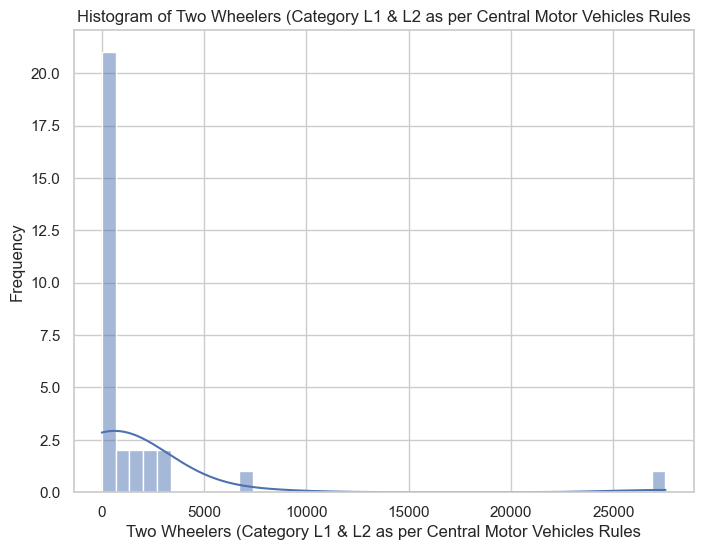

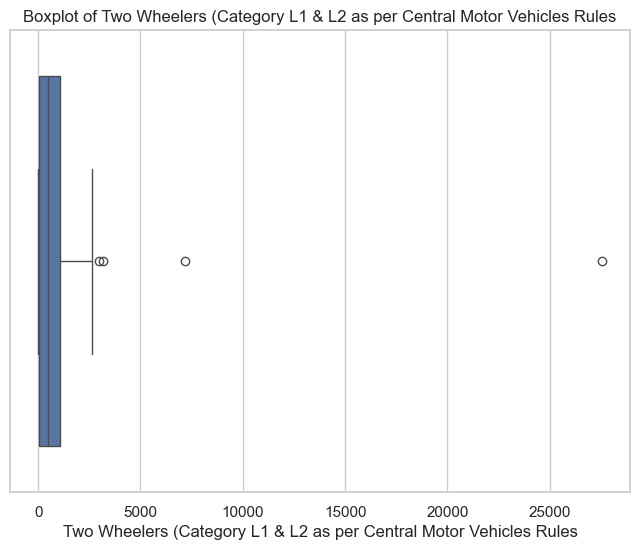


Univariate Analysis for Two Wheelers (Category L2 (CMVR)):

count       31.000000
mean       907.677419
std       2518.917378
min          0.000000
25%         19.000000
50%        228.000000
75%        767.500000
max      14069.000000
Name: Two Wheelers (Category L2 (CMVR)), dtype: float64


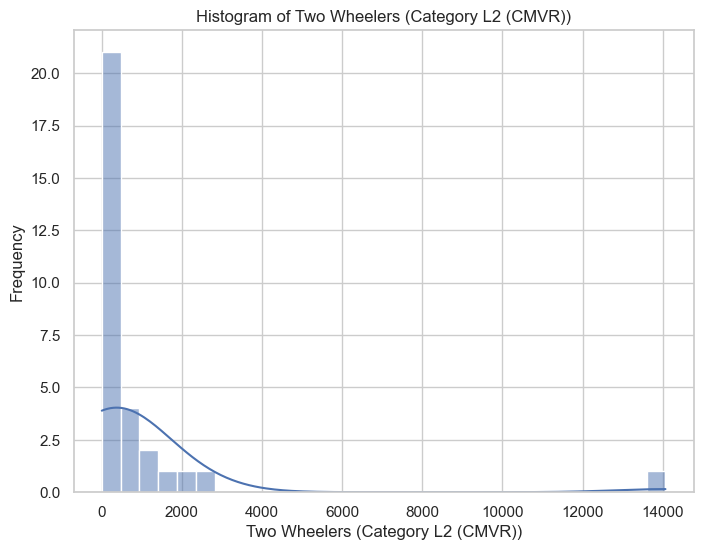

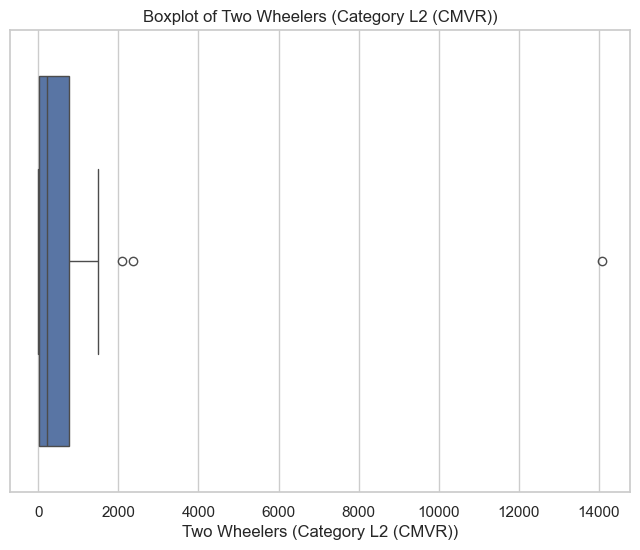


Univariate Analysis for Two Wheelers (Max power not exceeding 250 Watts):

count        31.000000
mean       7260.516129
std       20008.445495
min           0.000000
25%          94.000000
50%        2148.000000
75%        6639.000000
max      112538.000000
Name: Two Wheelers (Max power not exceeding 250 Watts), dtype: float64


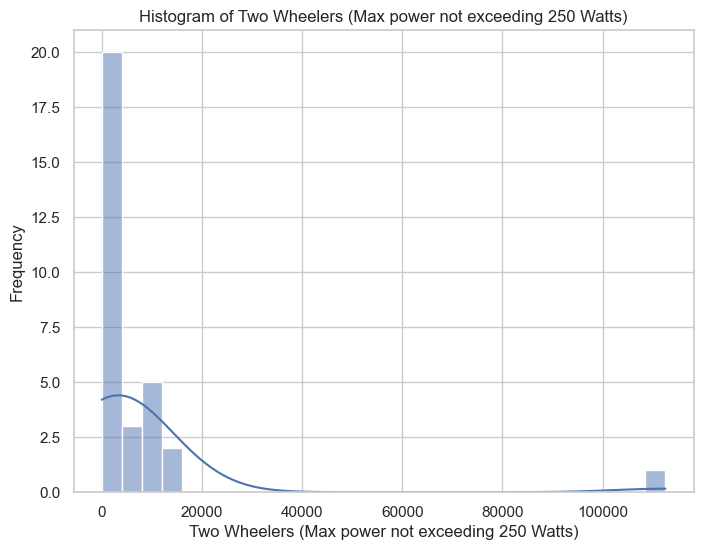

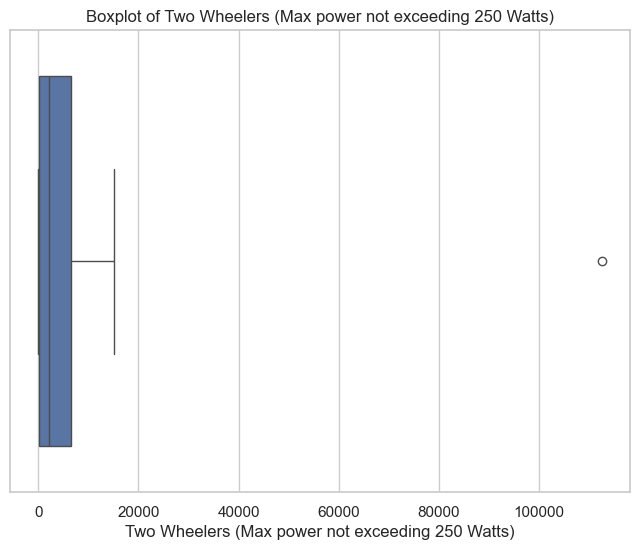


Univariate Analysis for Three Wheelers (Category L5 slow speed as per CMVR):

count     31.000000
mean      25.096774
std       73.990700
min        0.000000
25%        0.000000
50%        0.000000
75%        7.000000
max      389.000000
Name: Three Wheelers (Category L5 slow speed as per CMVR), dtype: float64


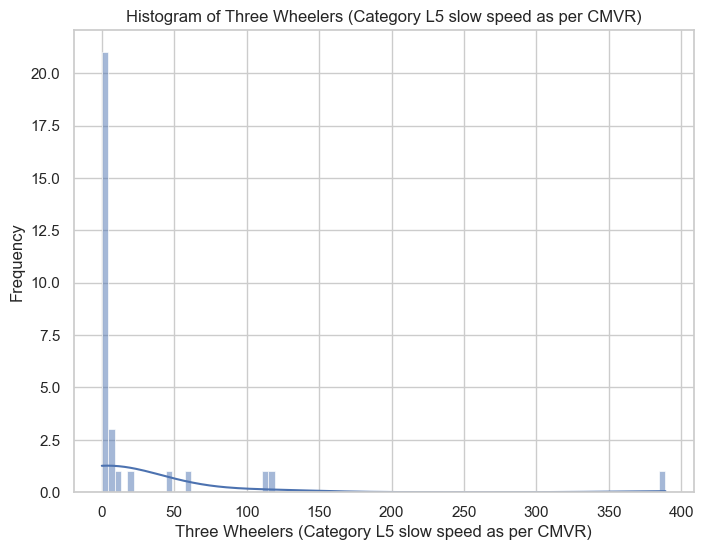

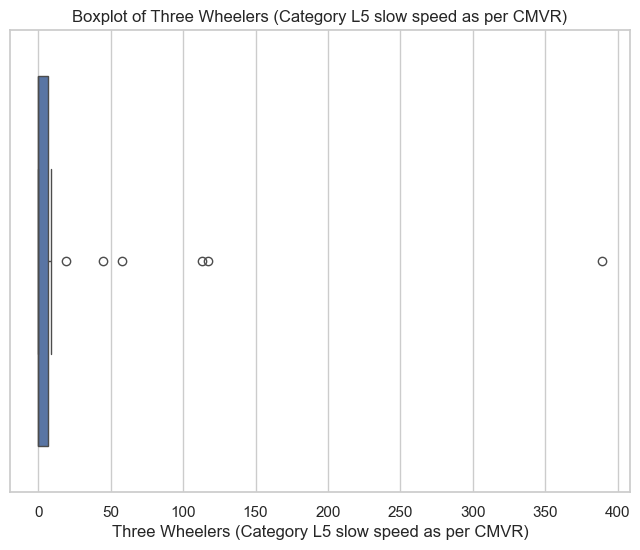


Univariate Analysis for Three Wheelers (Category L5 as per CMVR):

count     31.000000
mean      46.451613
std      131.491150
min        0.000000
25%        0.000000
50%        1.000000
75%       37.500000
max      720.000000
Name: Three Wheelers (Category L5 as per CMVR), dtype: float64


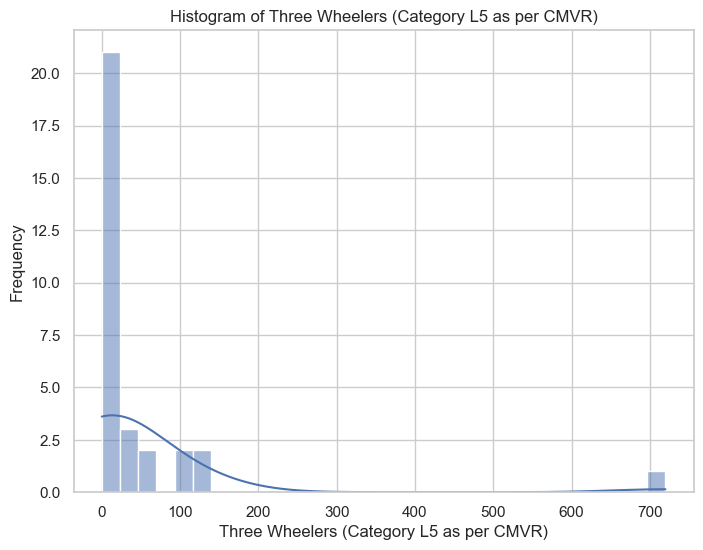

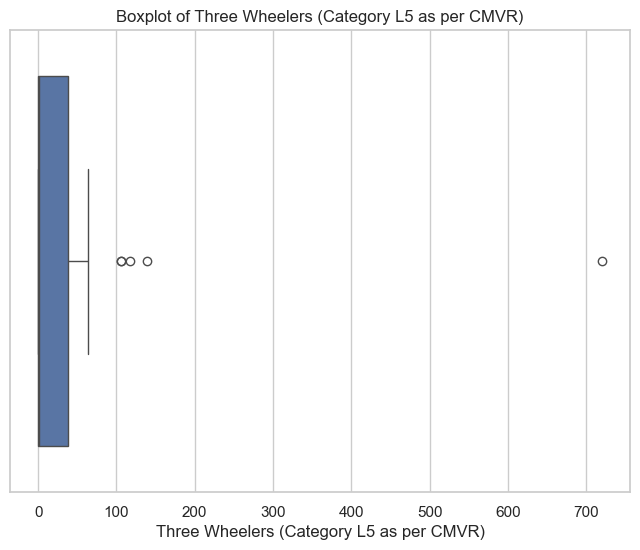


Univariate Analysis for Passenger Cars (Category M1 as per CMVR):

count        31.000000
mean       6811.032258
std       18941.726543
min           1.000000
25%         236.500000
50%         997.000000
75%        5487.500000
max      105571.000000
Name: Passenger Cars (Category M1 as per CMVR), dtype: float64


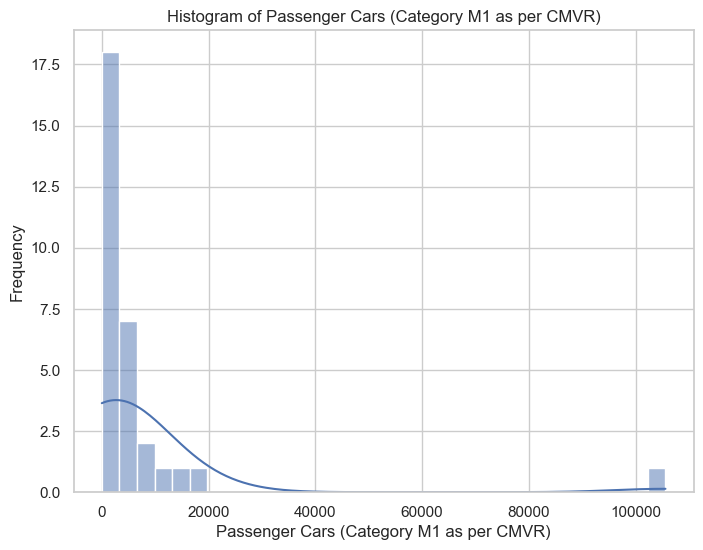

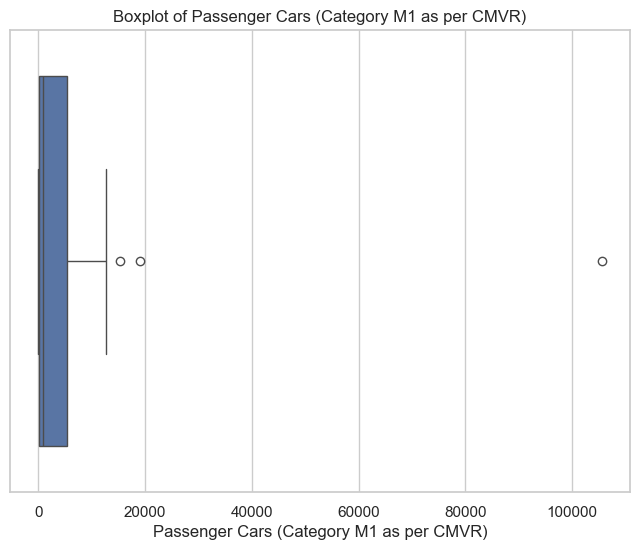


Univariate Analysis for Buses:

count    31.000000
mean      1.741935
std       6.016465
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      27.000000
Name: Buses, dtype: float64


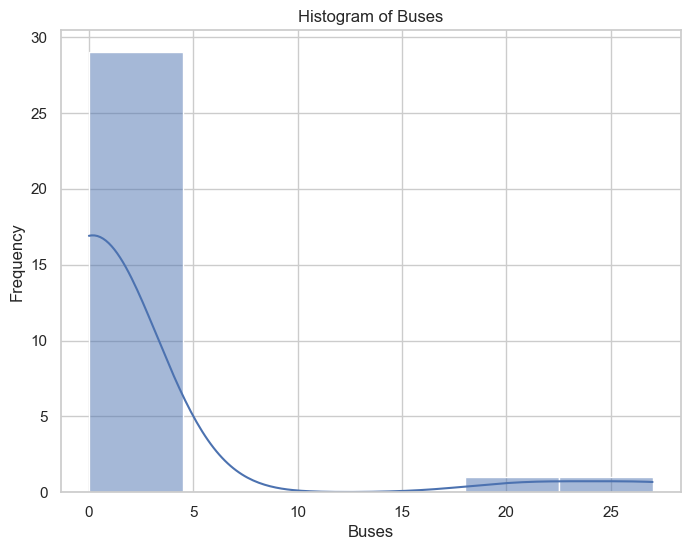

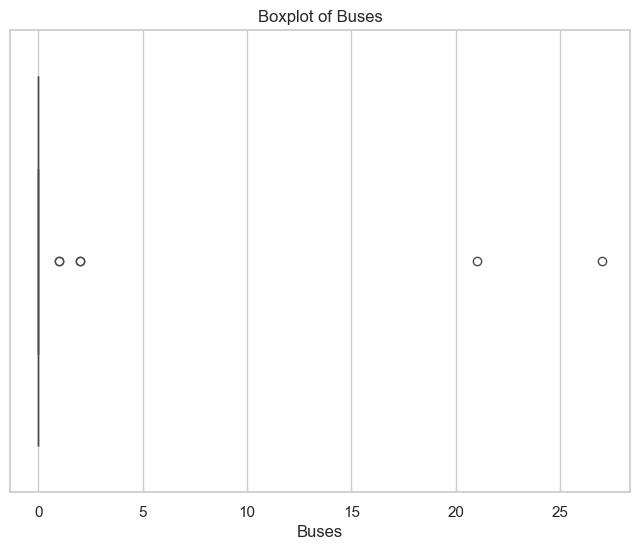


Univariate Analysis for Total in state:

count        31.000000
mean      16829.870968
std       46327.212405
min           6.000000
25%         665.000000
50%        4234.000000
75%       14951.500000
max      260863.000000
Name: Total in state, dtype: float64


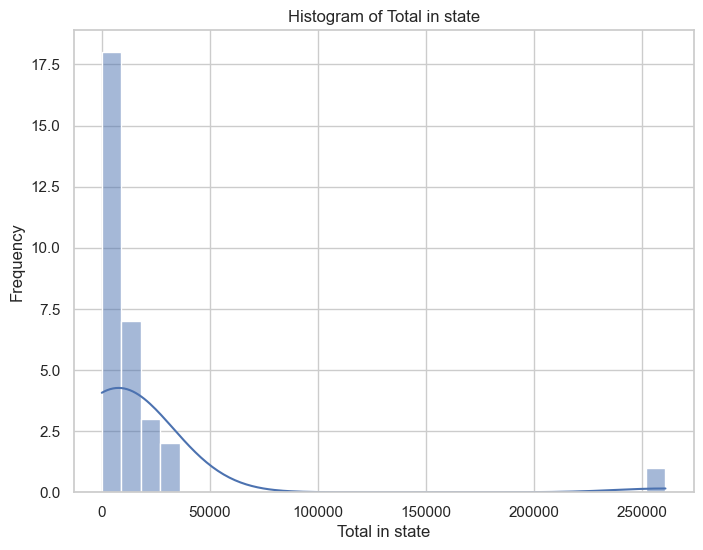

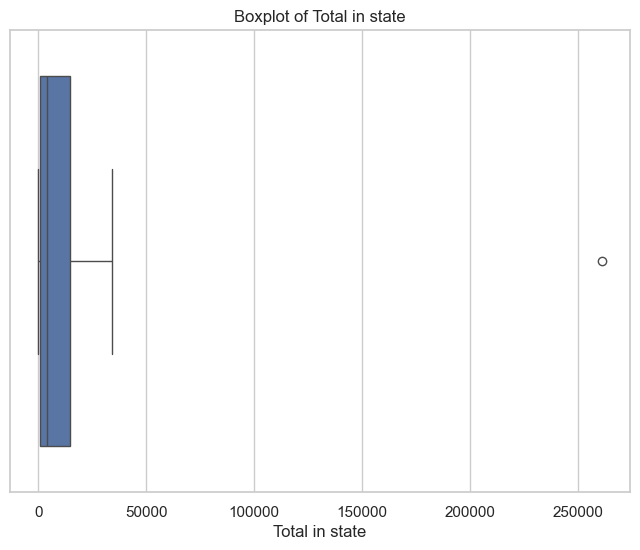

In [68]:
# Loop through numerical columns
for column in df_num:
    # Basic summary statistics
    print(f"\nUnivariate Analysis for {column}:\n")
    print(df[column].describe())

    # Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

    # Boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()


In [69]:
#Summary of numerical columns
df.describe().T

count          mean  \
Two Wheelers (Category L1 & L2 as per Central M...   31.0   1777.354839   
Two Wheelers (Category L2 (CMVR))                    31.0    907.677419   
Two Wheelers (Max power not exceeding 250 Watts)     31.0   7260.516129   
Three Wheelers (Category L5 slow speed as per C...   31.0     25.096774   
Three Wheelers (Category L5 as per CMVR)             31.0     46.451613   
Passenger Cars (Category M1 as per CMVR)             31.0   6811.032258   
Buses                                                31.0      1.741935   
Total in state                                       31.0  16829.870968   

                                                             std  min    25%  \
Two Wheelers (Category L1 & L2 as per Central M...   5000.160994  0.0   22.0   
Two Wheelers (Category L2 (CMVR))                    2518.917378  0.0   19.0   
Two Wheelers (Max power not exceeding 250 Watts)    20008.445495  0.0   94.0   
Three Wheelers (Category L5 slow speed as per C...     73.990700  0.0    0.0   
Three Wheelers (Category L5 as per CMVR)              131.491150  0.0    0.0   
Passenger Cars (Category M1 as per CMVR)            18941.726543  1.0  236.5   
Buses                                                   6.016465  0.0    0.0   
Total in state                                      46327.212405  6.0  665.0   

                                                       50%      75%       max  
Two Wheelers (Category L1 & L2 as per Central M...   463.0   1089.5   27549.0  
Two Wheelers (Category L2 (CMVR))                    228.0    767.5   14069.0  
Two Wheelers (Max power not exceeding 250 Watts)    2148.0   6639.0  112538.0  
Three Wheelers (Category L5 slow speed as per C...     0.0      7.0     389.0  
Three Wheelers (Category L5 as per CMVR)               1.0     37.5     720.0  
Passenger Cars (Category M1 as per CMVR)             997.0   5487.5  105571.0  
Buses                                                  0.0      0.0      27.0  
Total in state                                      4234.0  14951.5  260863.0

- 1.There are maximum of 27 busus.
- 2.There are max of 14069 Two Wheelers of Category L2 (CMVR).
- 3.There are max of 112538 Two Wheelers of Max power not exceeding 250 Watts
- 4.There are total of 260863 vehicles in all states combined.

In [70]:
#Summary of categorical column
df.describe(include=object)

Sl. No           State
count      31              31
unique     31              31
top         1  Andhra Pradesh
freq        1               1

In [71]:
df.head(31)

Sl. No                      State  \
0       1             Andhra Pradesh   
1       2                      Assam   
2       3                      Bihar   
3       4               Chhattisgarh   
4       5                      Delhi   
5       6                        Goa   
6       7                    Gujarat   
7       8                    Haryana   
8       9           Himachal Pradesh   
9      10            Jammu & Kashmir   
10     11                  Jharkhand   
11     12                  Karnataka   
12     13                     Kerala   
13     14             Madhya Pradesh   
14     15                Maharashtra   
15     16                    Manipur   
16     17                  Meghalaya   
17     18                   Nagaland   
18     19                     Odisha   
19     20                     Punjab   
20     21                  Rajasthan   
21     22                 Tamil Nadu   
22     23                  Telangana   
23     24                    Tripura   
24     25              Uttar Pradesh   
25     26                 Uttarkhand   
26     27                West Bengal   
27     28  Andaman & Nicobar islands   
28     29                 Chandigarh   
29     30     Dadra and Nagar Haveli   
30     31                      Total   

    Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  \
0                                               431.0                    
1                                               463.0                    
2                                               252.0                    
3                                               613.0                    
4                                              1395.0                    
5                                                 0.0                    
6                                              7182.0                    
7                                              3162.0                    
8                                                 0.0                    
9                                                 2.0                    
10                                               75.0                    
11                                              784.0                    
12                                              432.0                    
13                                              503.0                    
14                                             2630.0                    
15                                               16.0                    
16                                                0.0                    
17                                                0.0                    
18                                              377.0                    
19                                              698.0                    
20                                             2036.0                    
21                                              491.0                    
22                                              535.0                    
23                                               28.0                    
24                                             2954.0                    
25                                              423.0                    
26                                             1451.0                    
27                                                0.0                    
28                                              612.0                    
29                                                4.0                    
30                                            27549.0                    

    Two Wheelers (Category L2 (CMVR))  \
0                               692.0   
1                               138.0   
2                               430.0   
3                               382.0   
4                               251.0   
5                                 0.0   
6                               217.0   
7                        

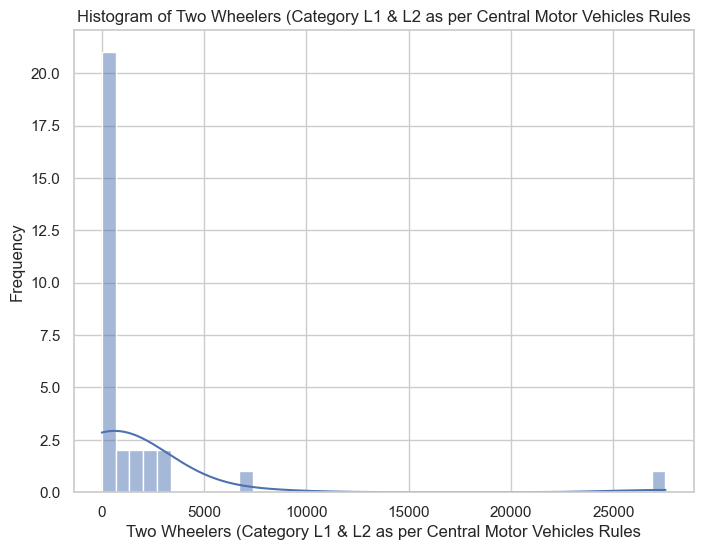

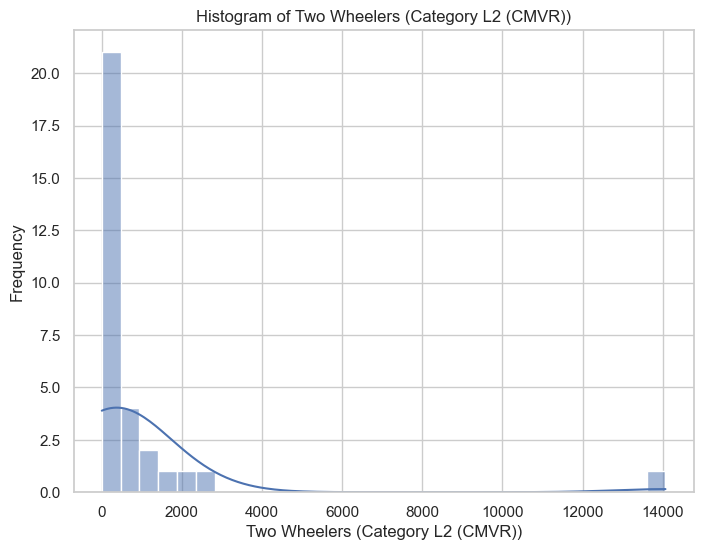

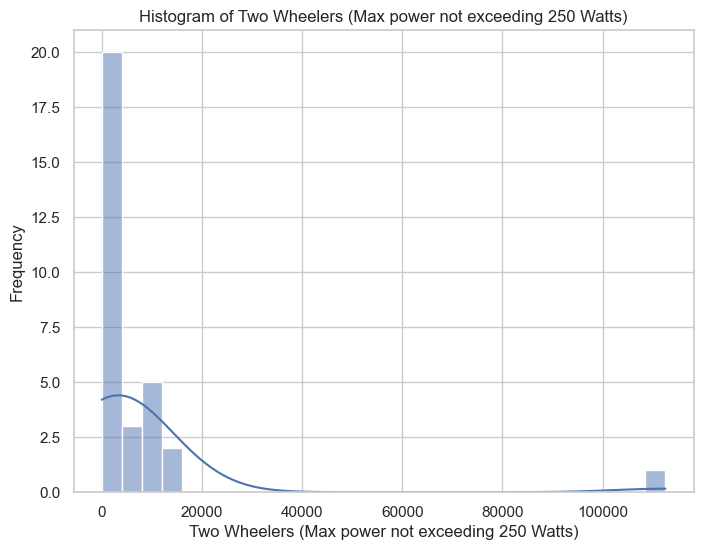

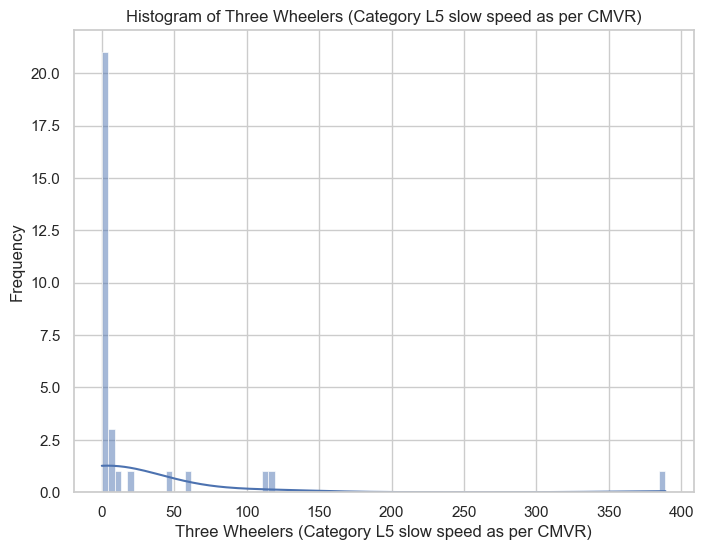

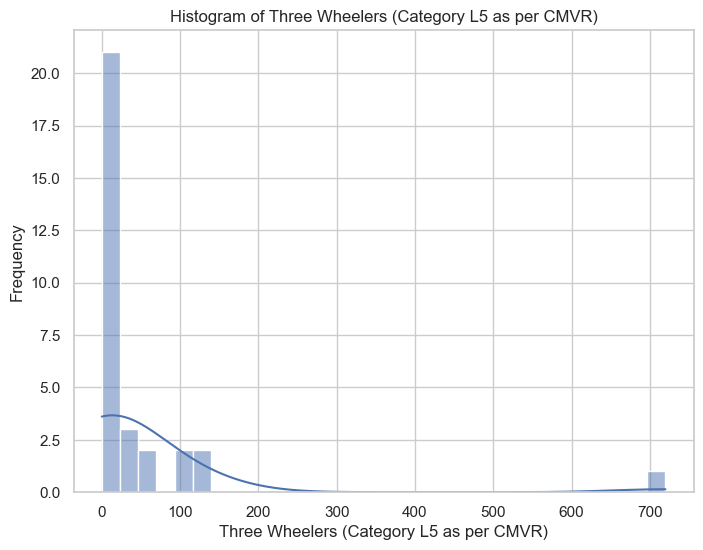

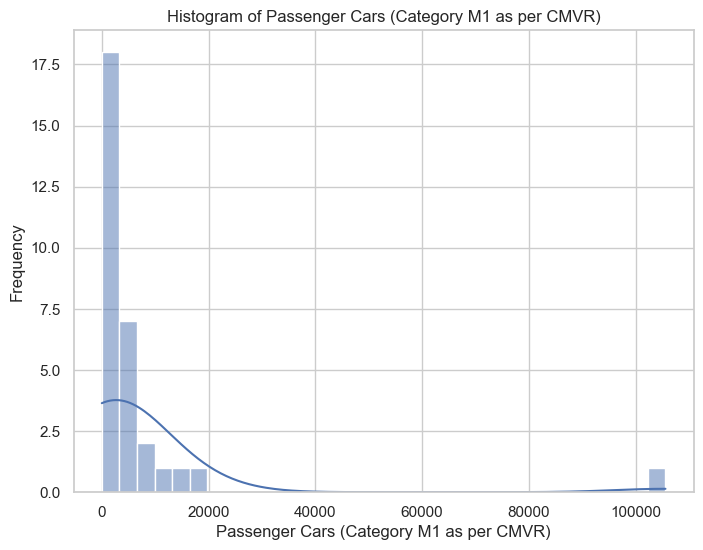

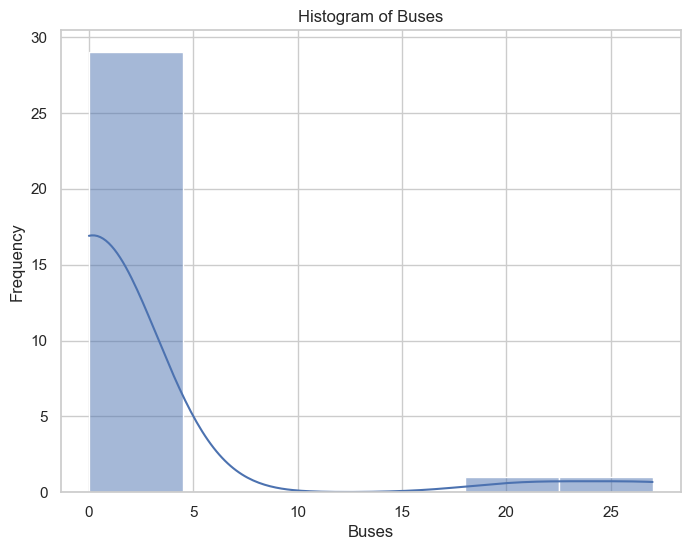

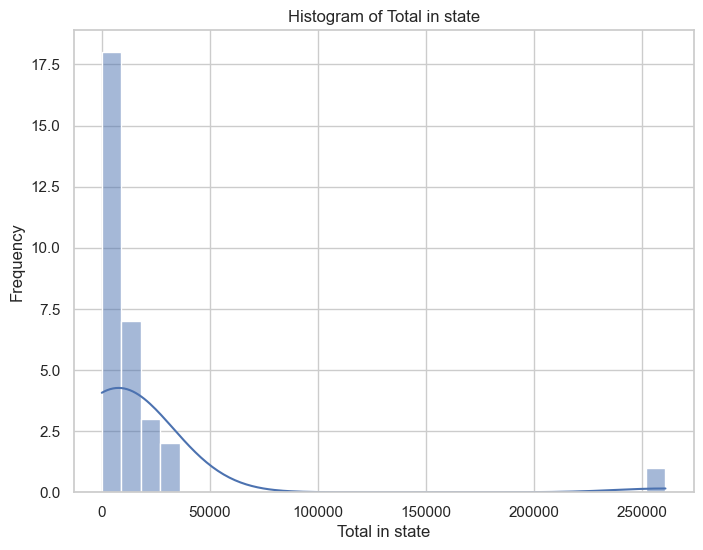

In [72]:
for column in df_num:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


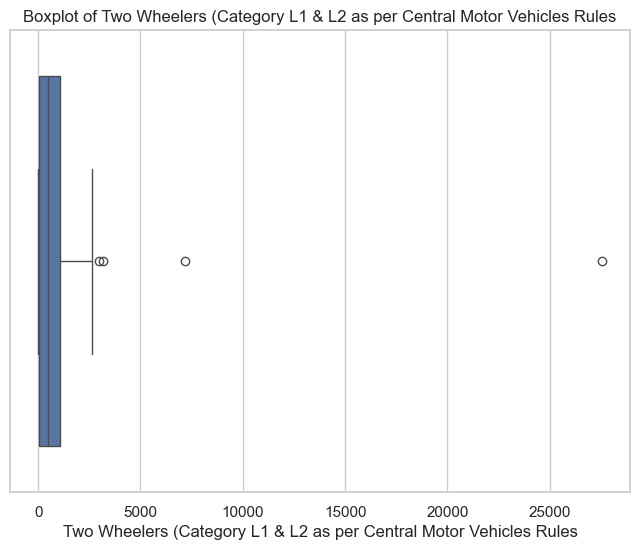

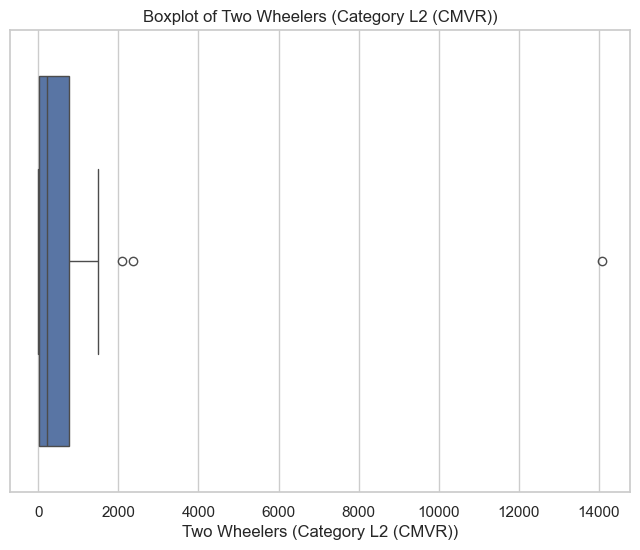

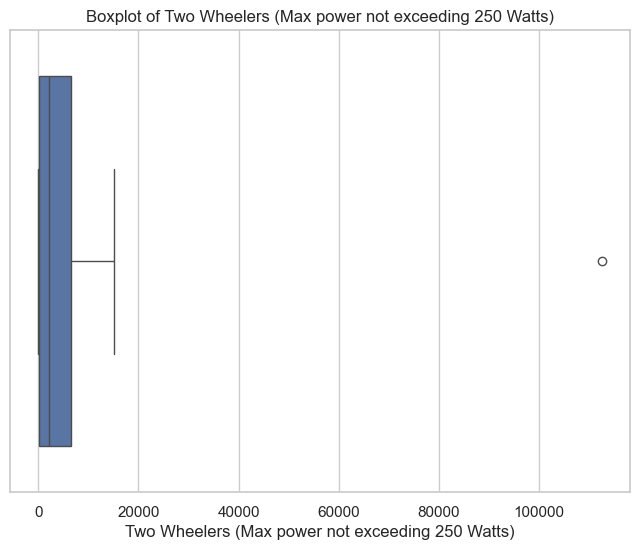

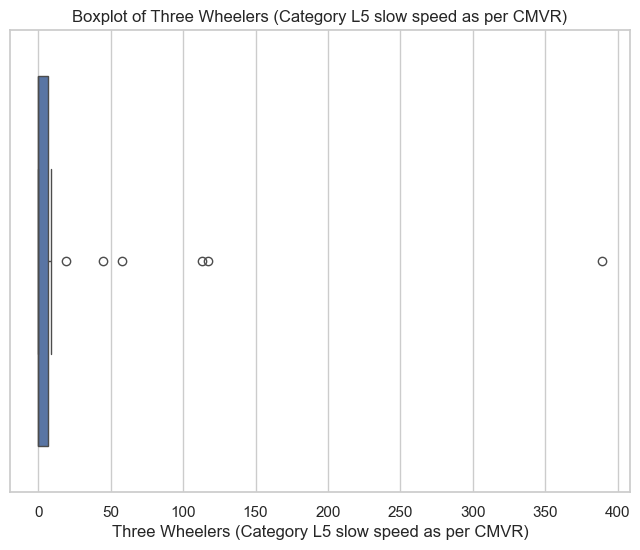

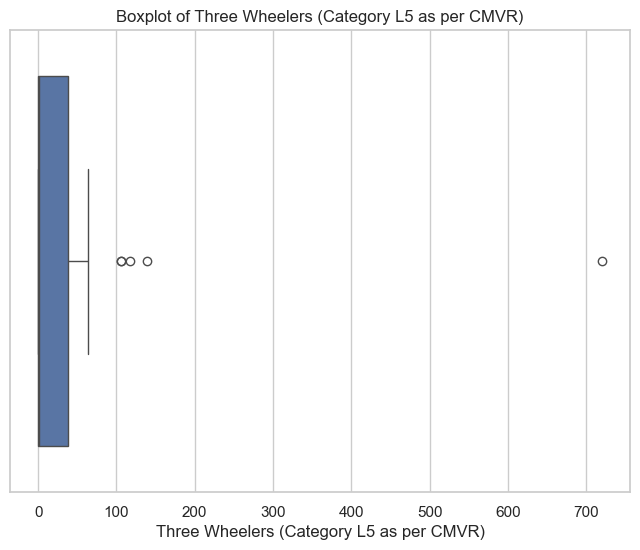

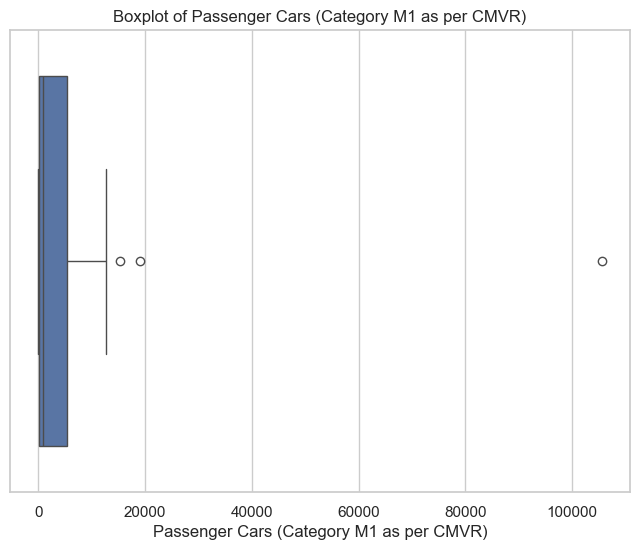

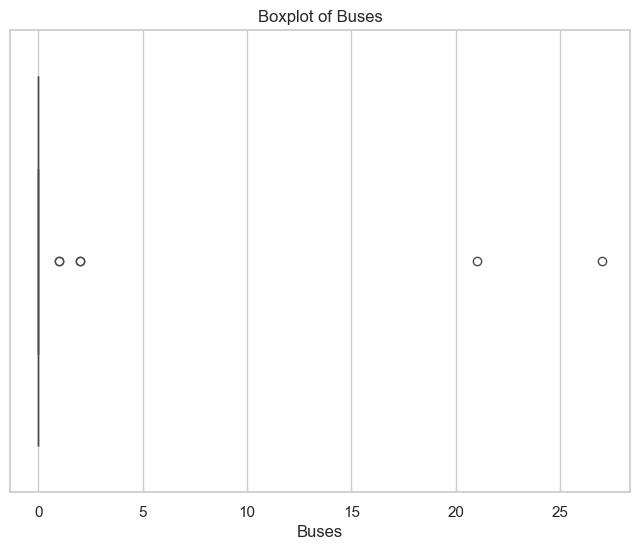

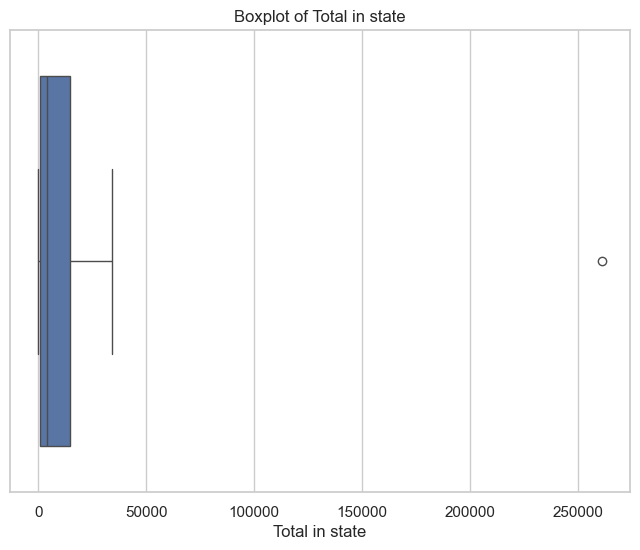

In [73]:
for column in df_num:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()


- 1.Most of the state does not have any buses.
- 2.There are only 1 state which has more than 20 buses.
- 3.There is only 2 state which have passenger car of EV type closer to 20000.
- 4.There are only 3 states which have Three Wheelers of Category L5 above 100.
- 5.There are only 2 states which have Three Wheelers of Category L5 slow speed above 100.
- 6.There are only 2 states which have Two Wheelers Category L2 above 2000.
- 7.There is only one state which have Two Wheelers (Category L1 and L2) above 5000.

In [74]:
df1 = df.drop(index=30)
df1 = df.reset_index(drop=True)


In [75]:
df2=df1.drop(columns=['Total in state'])

In [76]:
df1_num=df1.select_dtypes(include=np.number)
df1_cat=df1.select_dtypes(exclude=np.number)

In [77]:
df2_num=df2.select_dtypes(include=np.number)
df2_cat=df2.select_dtypes(exclude=np.number)

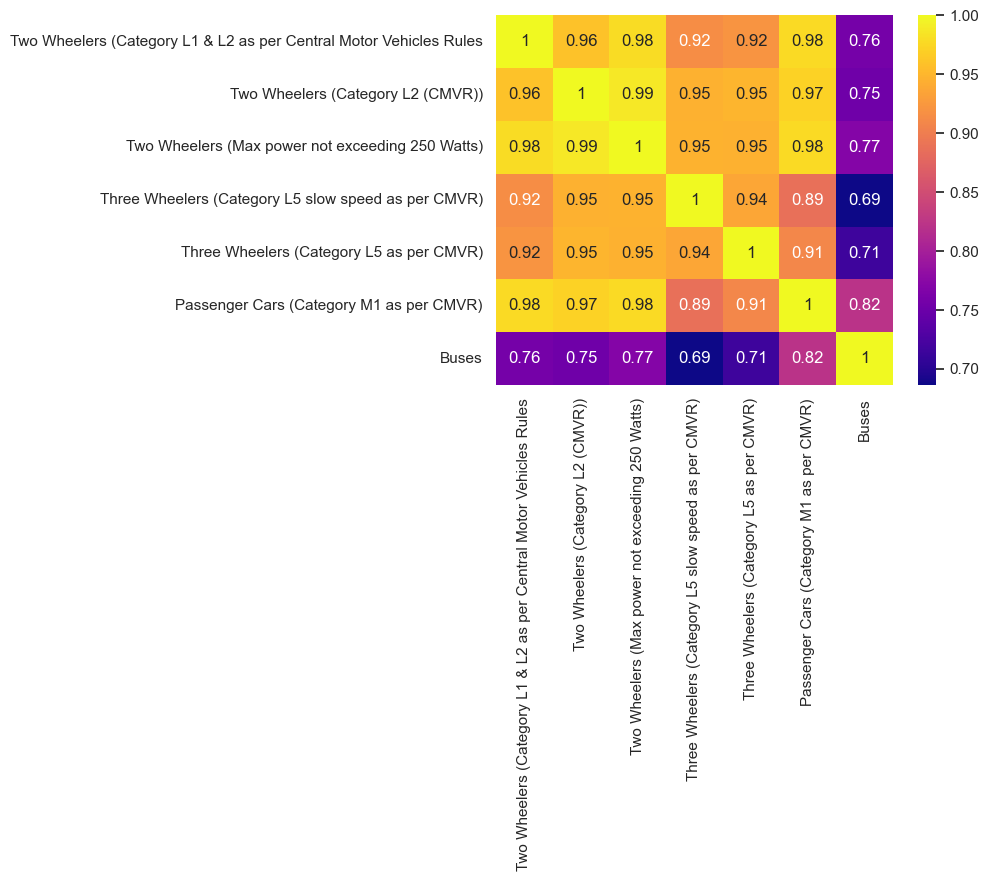

In [78]:
sns.heatmap(df2_num.corr(),annot=True,cmap='plasma')
plt.show()

- 1.All the columns are highly correalted
- 2.The Buses column andThree Wheelers (Category L5 slow speed) is least highly coorelated to the tune of 0.69.
- 3.The column Two Wheelers (Max power not exceeding 250 Watts) and Two Wheelers (Category L2 (CMVR) has highest correaltion of 0.99

In [79]:
df2.columns

Index(['Sl. No', 'State',
       'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
       'Two Wheelers (Category L2 (CMVR))',
       'Two Wheelers (Max power not exceeding 250 Watts)',
       'Three Wheelers (Category L5 slow speed as per CMVR)',
       'Three Wheelers (Category L5 as per CMVR)',
       'Passenger Cars (Category M1 as per CMVR)', 'Buses'],
      dtype='object')

In [80]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 9 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Sl. No                                                              31 non-null     object 
 1   State                                                               31 non-null     object 
 2   Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  31 non-null     float64
 3   Two Wheelers (Category L2 (CMVR))                                   31 non-null     float64
 4   Two Wheelers (Max power not exceeding 250 Watts)                    31 non-null     float64
 5   Three Wheelers (Category L5 slow speed as per CMVR)                 31 non-null     float64
 6   Three Wheelers (Category L5 as per CMVR)                            31 non-null     float64
 7   Passenger Cars (Cate

<Figure size 1000x600 with 0 Axes>

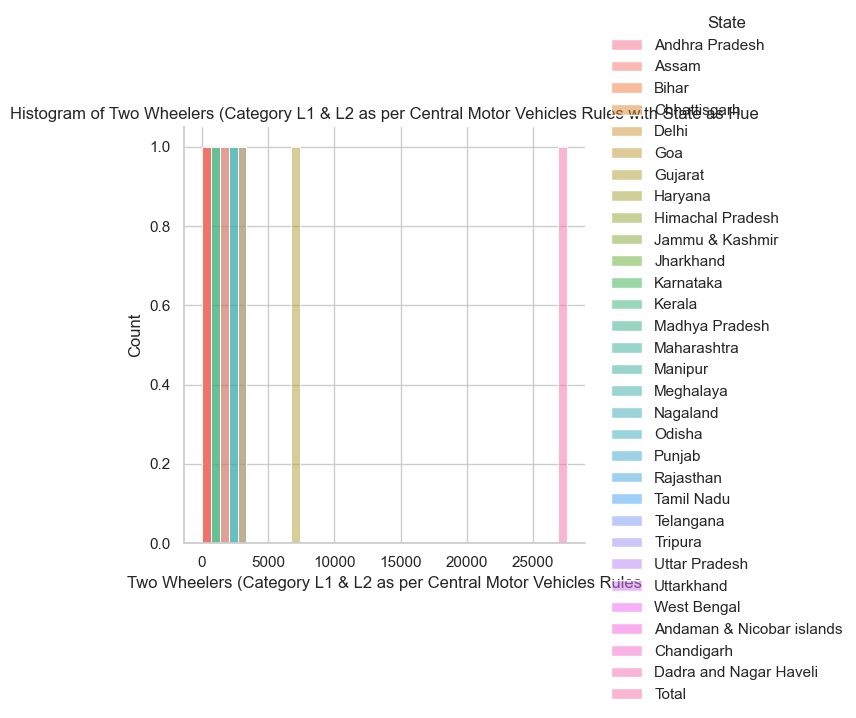

<Figure size 1000x600 with 0 Axes>

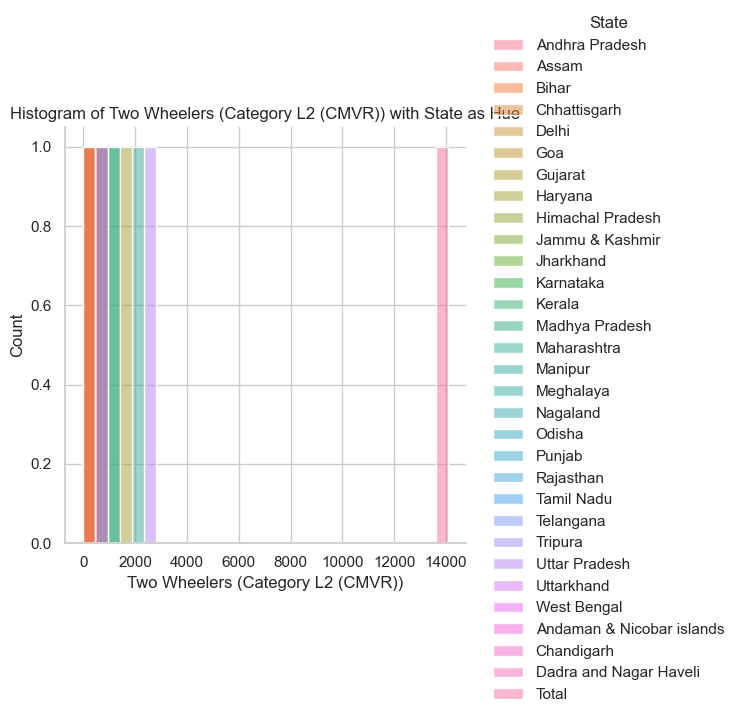

<Figure size 1000x600 with 0 Axes>

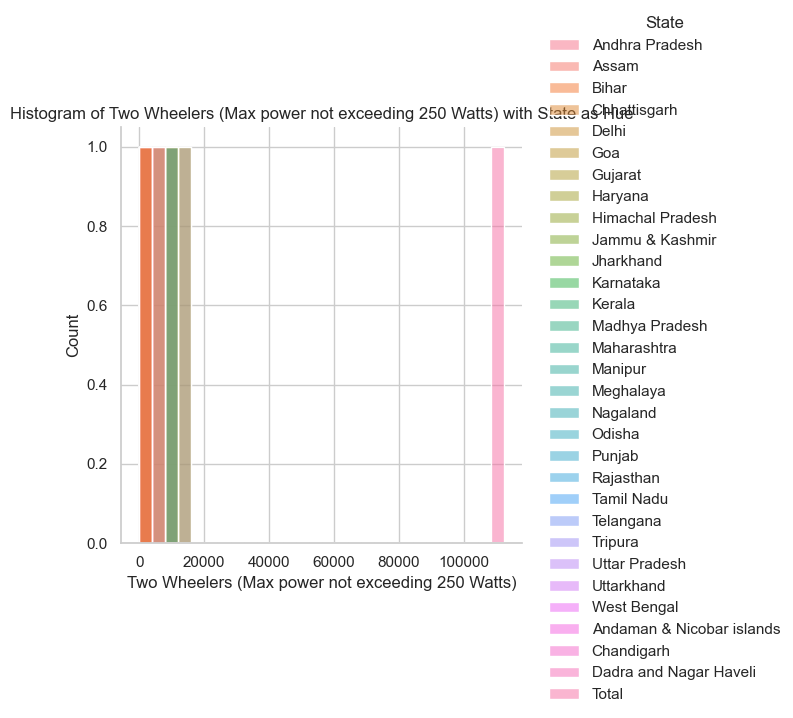

<Figure size 1000x600 with 0 Axes>

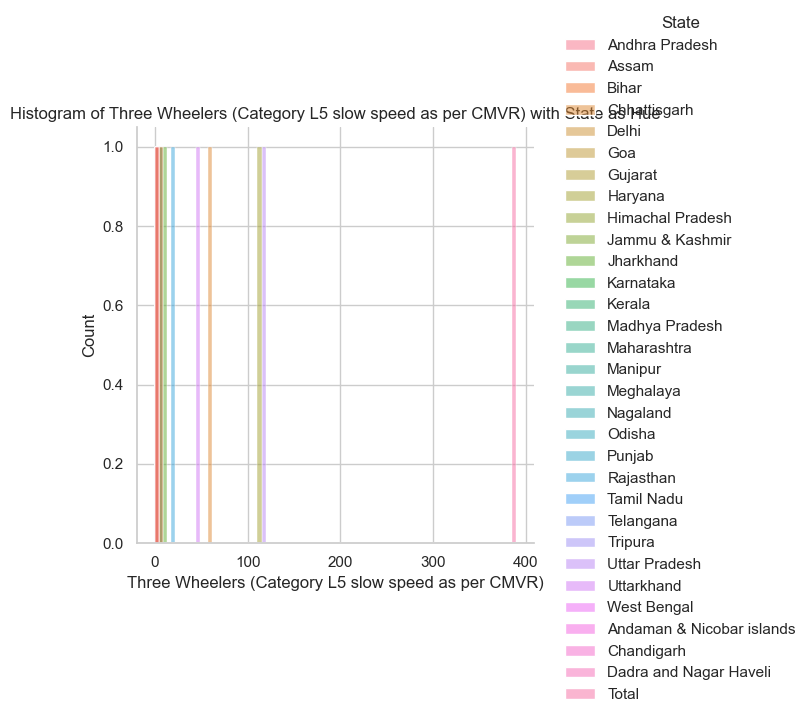

<Figure size 1000x600 with 0 Axes>

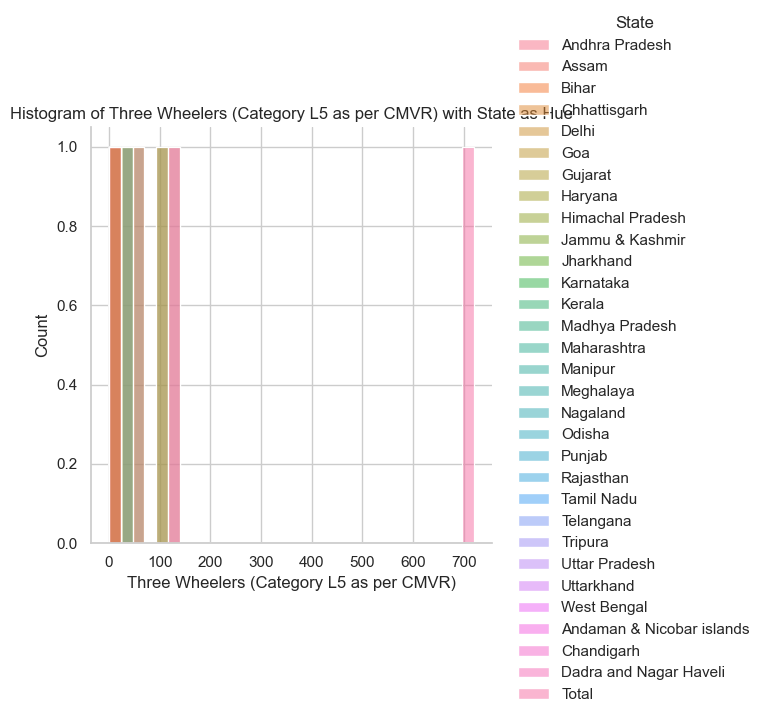

<Figure size 1000x600 with 0 Axes>

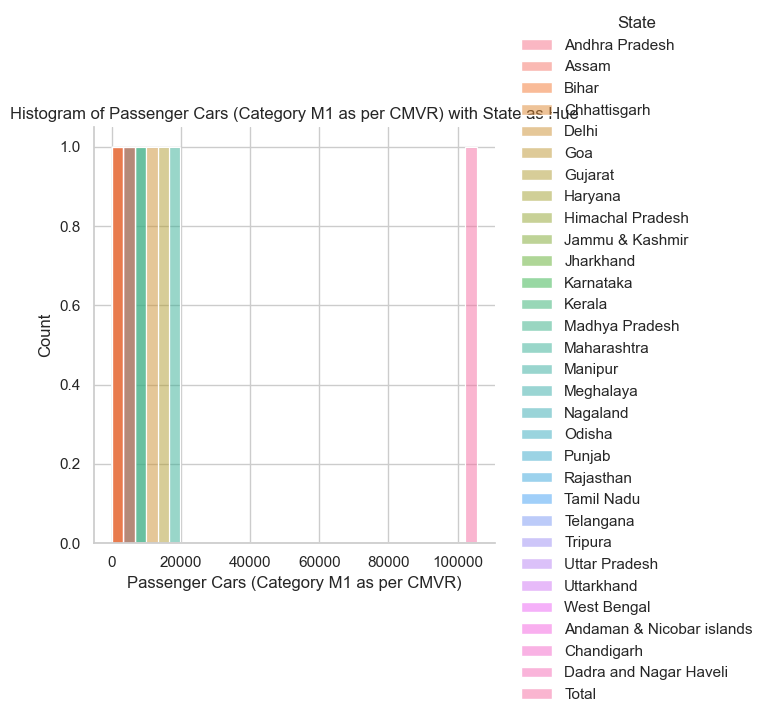

<Figure size 1000x600 with 0 Axes>

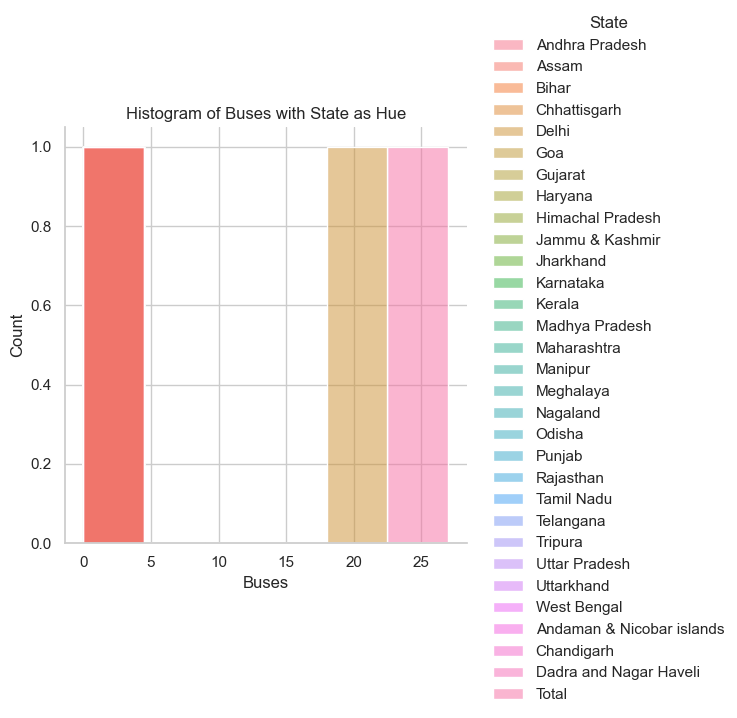

In [81]:
numerical_columns = ['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
                     'Two Wheelers (Category L2 (CMVR))',
                     'Two Wheelers (Max power not exceeding 250 Watts)',
                     'Three Wheelers (Category L5 slow speed as per CMVR)',
                     'Three Wheelers (Category L5 as per CMVR)',
                     'Passenger Cars (Category M1 as per CMVR)',
                     'Buses']
categorical_column = 'State'

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.displot(df, x=column, hue=categorical_column, kde=True)
    plt.title(f'Histogram of {column} with {categorical_column} as Hue')
    plt.show()


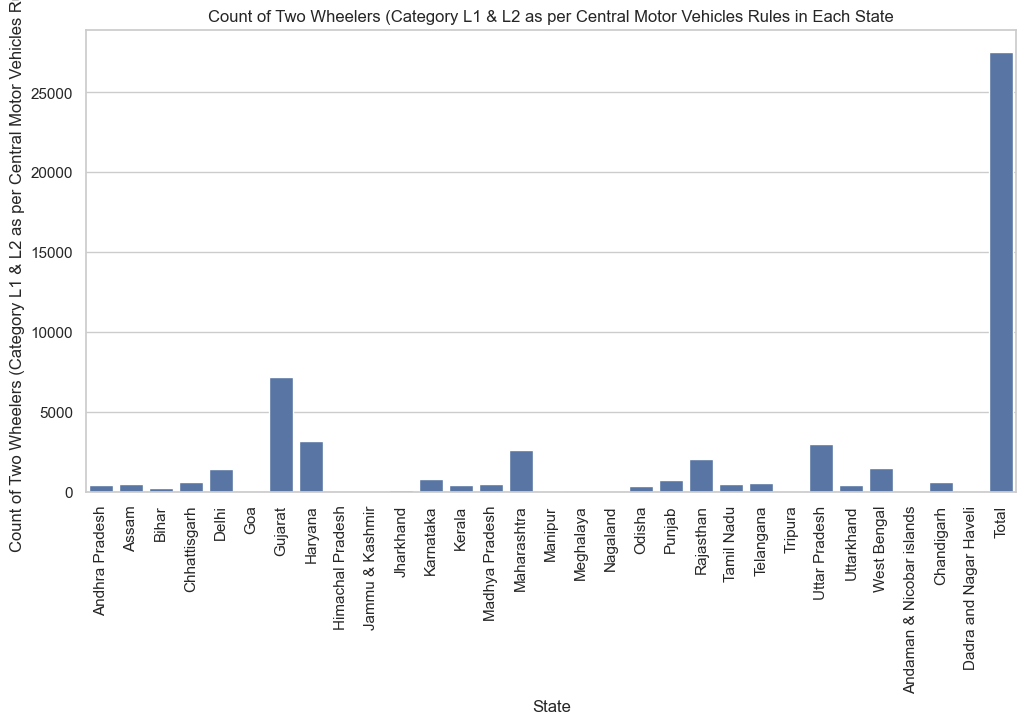

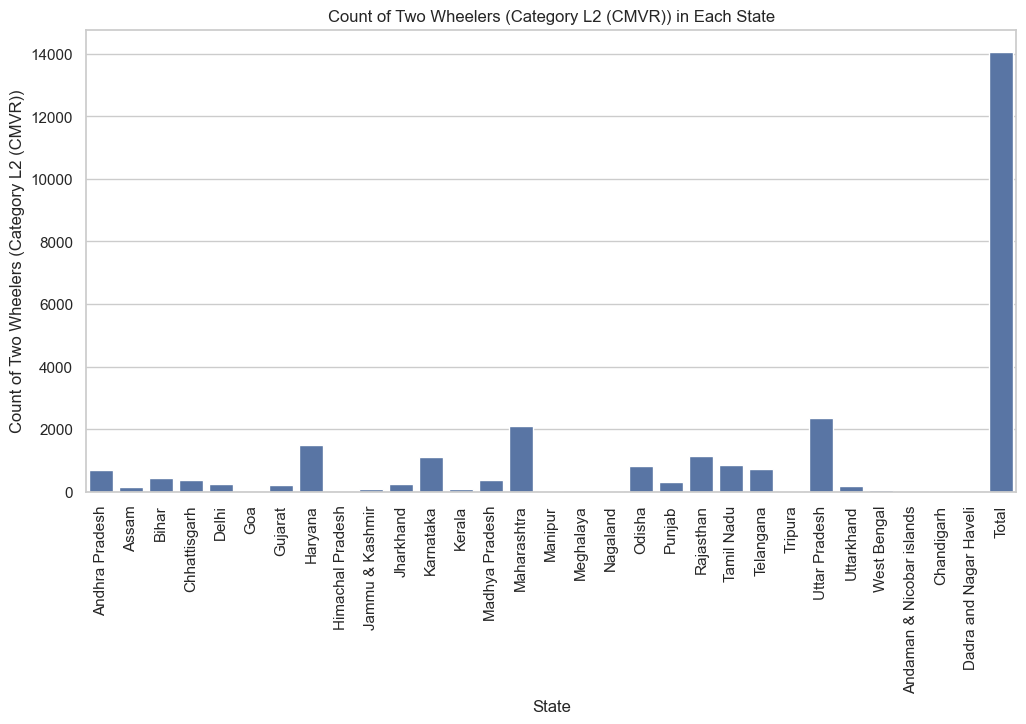

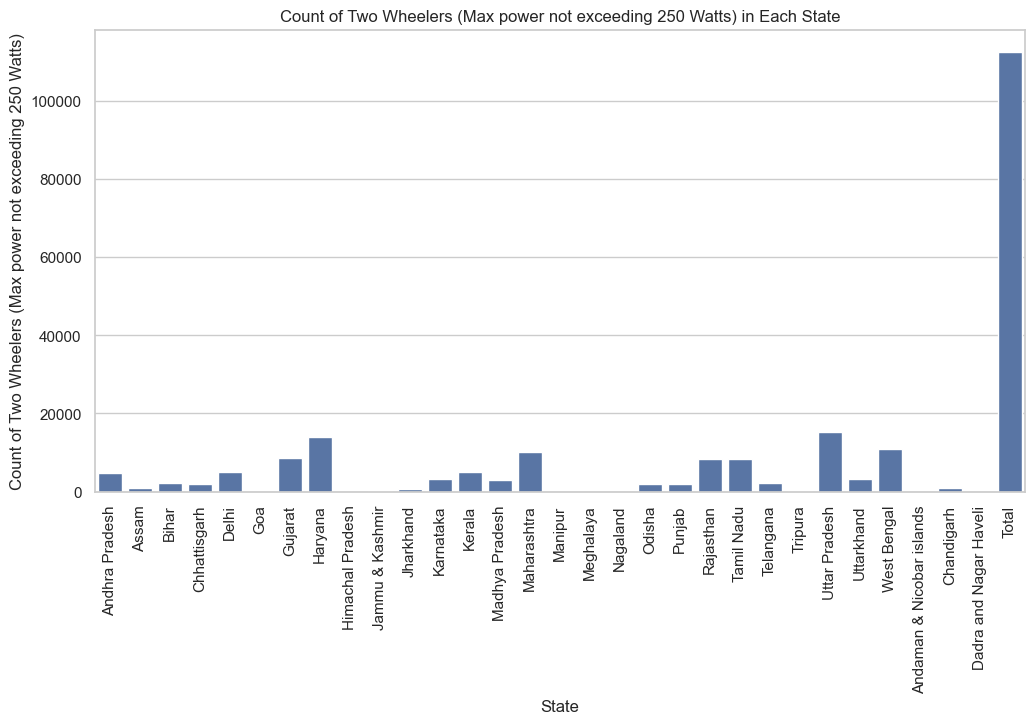

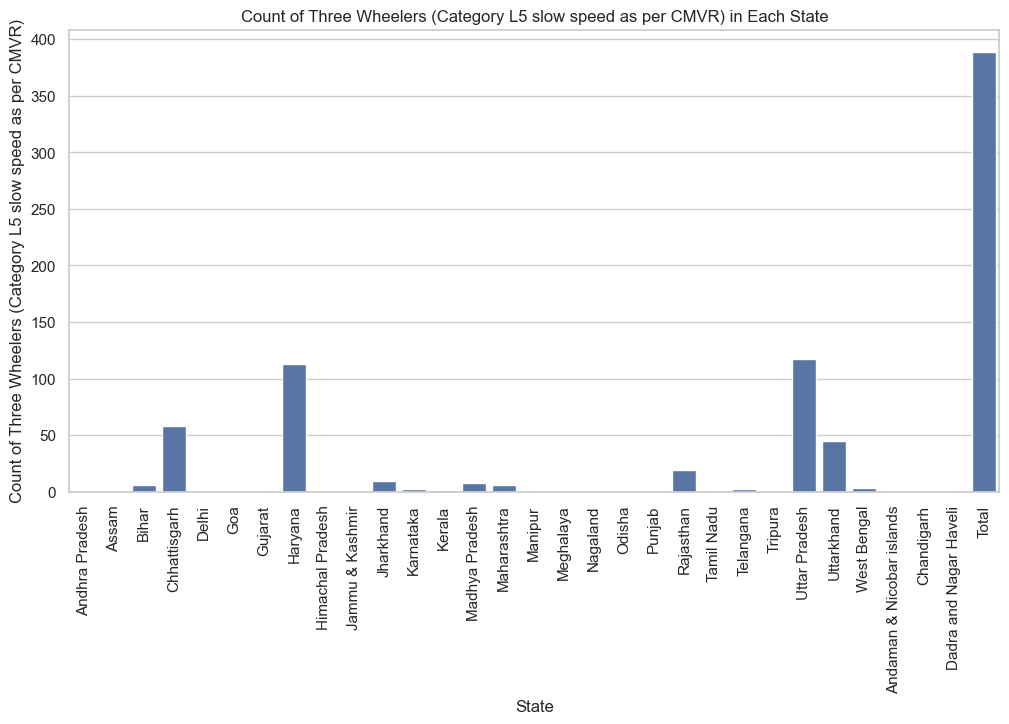

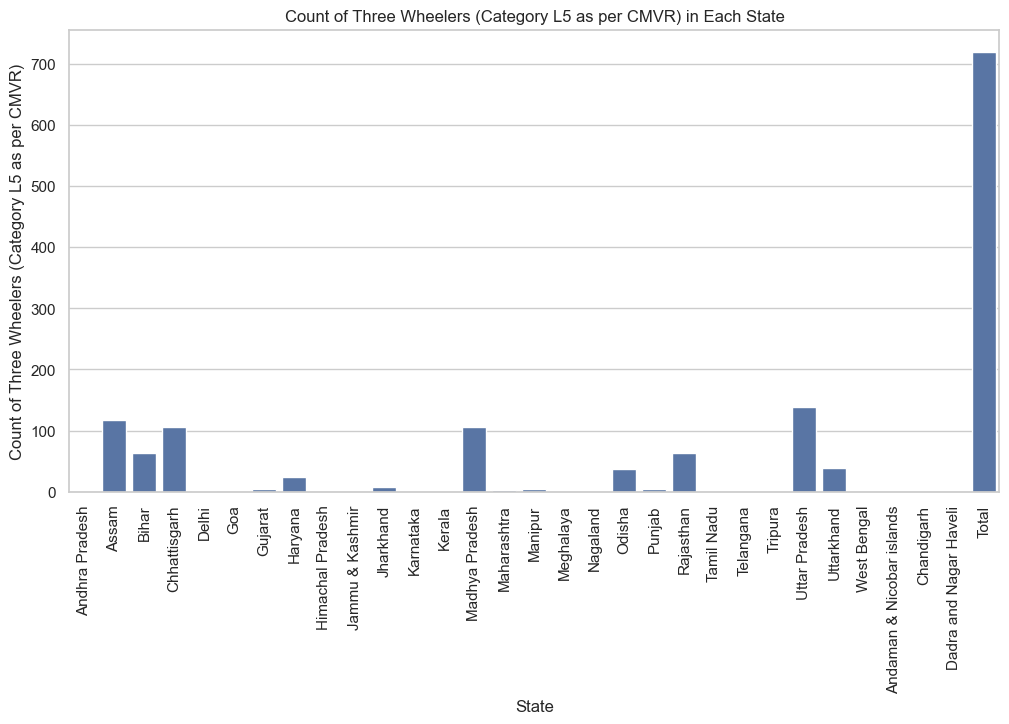

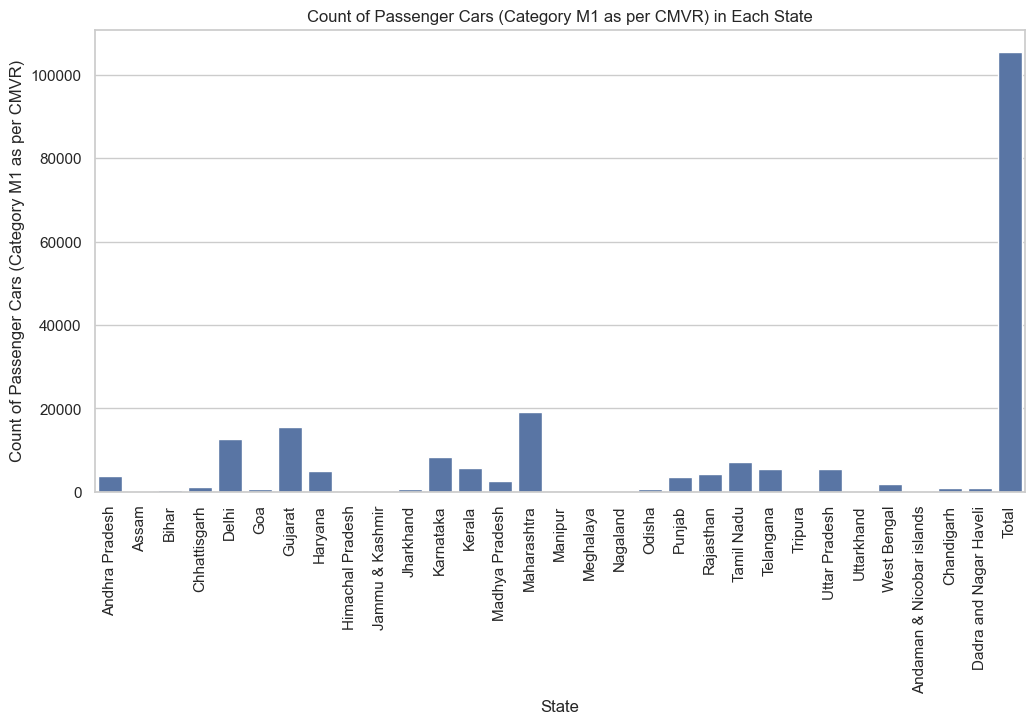

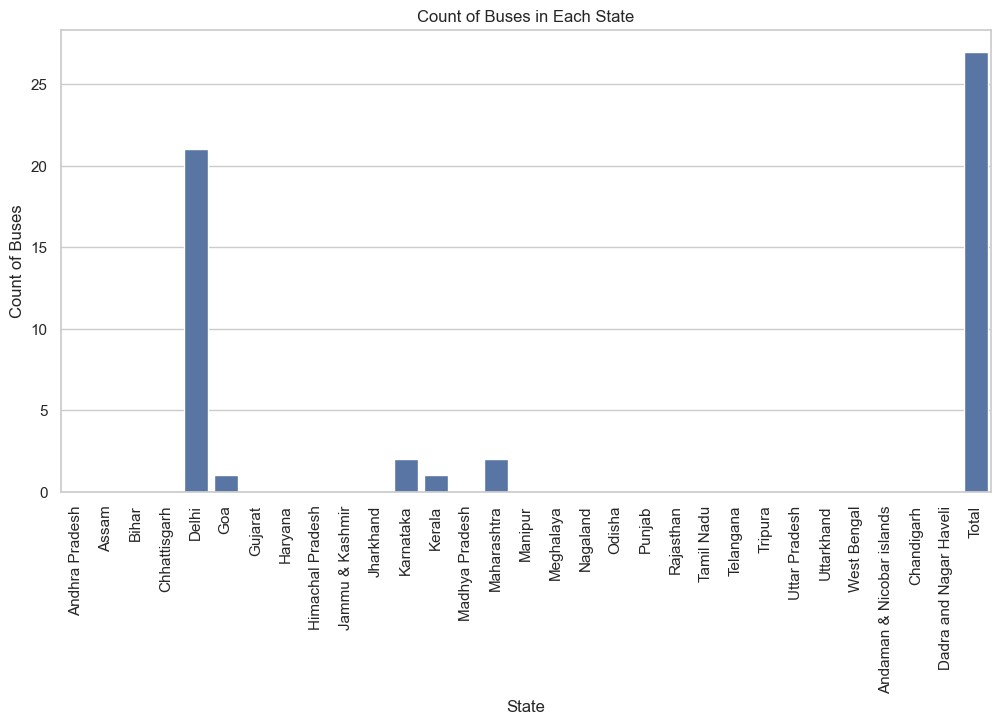

In [82]:
numerical_columns = ['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
                     'Two Wheelers (Category L2 (CMVR))',
                     'Two Wheelers (Max power not exceeding 250 Watts)',
                     'Three Wheelers (Category L5 slow speed as per CMVR)',
                     'Three Wheelers (Category L5 as per CMVR)',
                     'Passenger Cars (Category M1 as per CMVR)',
                     'Buses']
categorical_column = 'State'

# Loop through numerical columns for bivariate analysis
for column in numerical_columns:
    # Create a bar plot with State on the x-axis and count of vehicles on the y-axis
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=categorical_column, y=column, data=df)
    plt.title(f'Count of {column} in Each State')
    plt.ylabel(f'Count of {column}')
    
    # Rotate x-axis labels by 90 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    plt.show()


- 1.Gujrat the highest no. of Two Wheelers (Category L1 & L2 ) of more than 5000.
- 2.There are 10 states and union territories combined that does not have Two Wheelers (Category L1 & L2 ).
- 3.Uttar Pradesh has the highest no. of Two Wheelers of (Category L2 (CMVR).
- 4.Uttar Pradesh has the highest no. of  Two Wheelers (Max power not exceeding 250 Watts).
- 5.Uttar Pradesh has the highest no. of Three Wheelers.
- 6.Maharastra has highest count of Passenger cars (Category M1 as per CMVR).
- 7.Delhi has the highest no. of buses of EV type numbered above 20.
- 8.There is total of little over 25 busus of EV type in whole country.

In [83]:
df2_num.columns

Index(['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
       'Two Wheelers (Category L2 (CMVR))',
       'Two Wheelers (Max power not exceeding 250 Watts)',
       'Three Wheelers (Category L5 slow speed as per CMVR)',
       'Three Wheelers (Category L5 as per CMVR)',
       'Passenger Cars (Category M1 as per CMVR)', 'Buses'],
      dtype='object')

<Figure size 1500x1500 with 0 Axes>

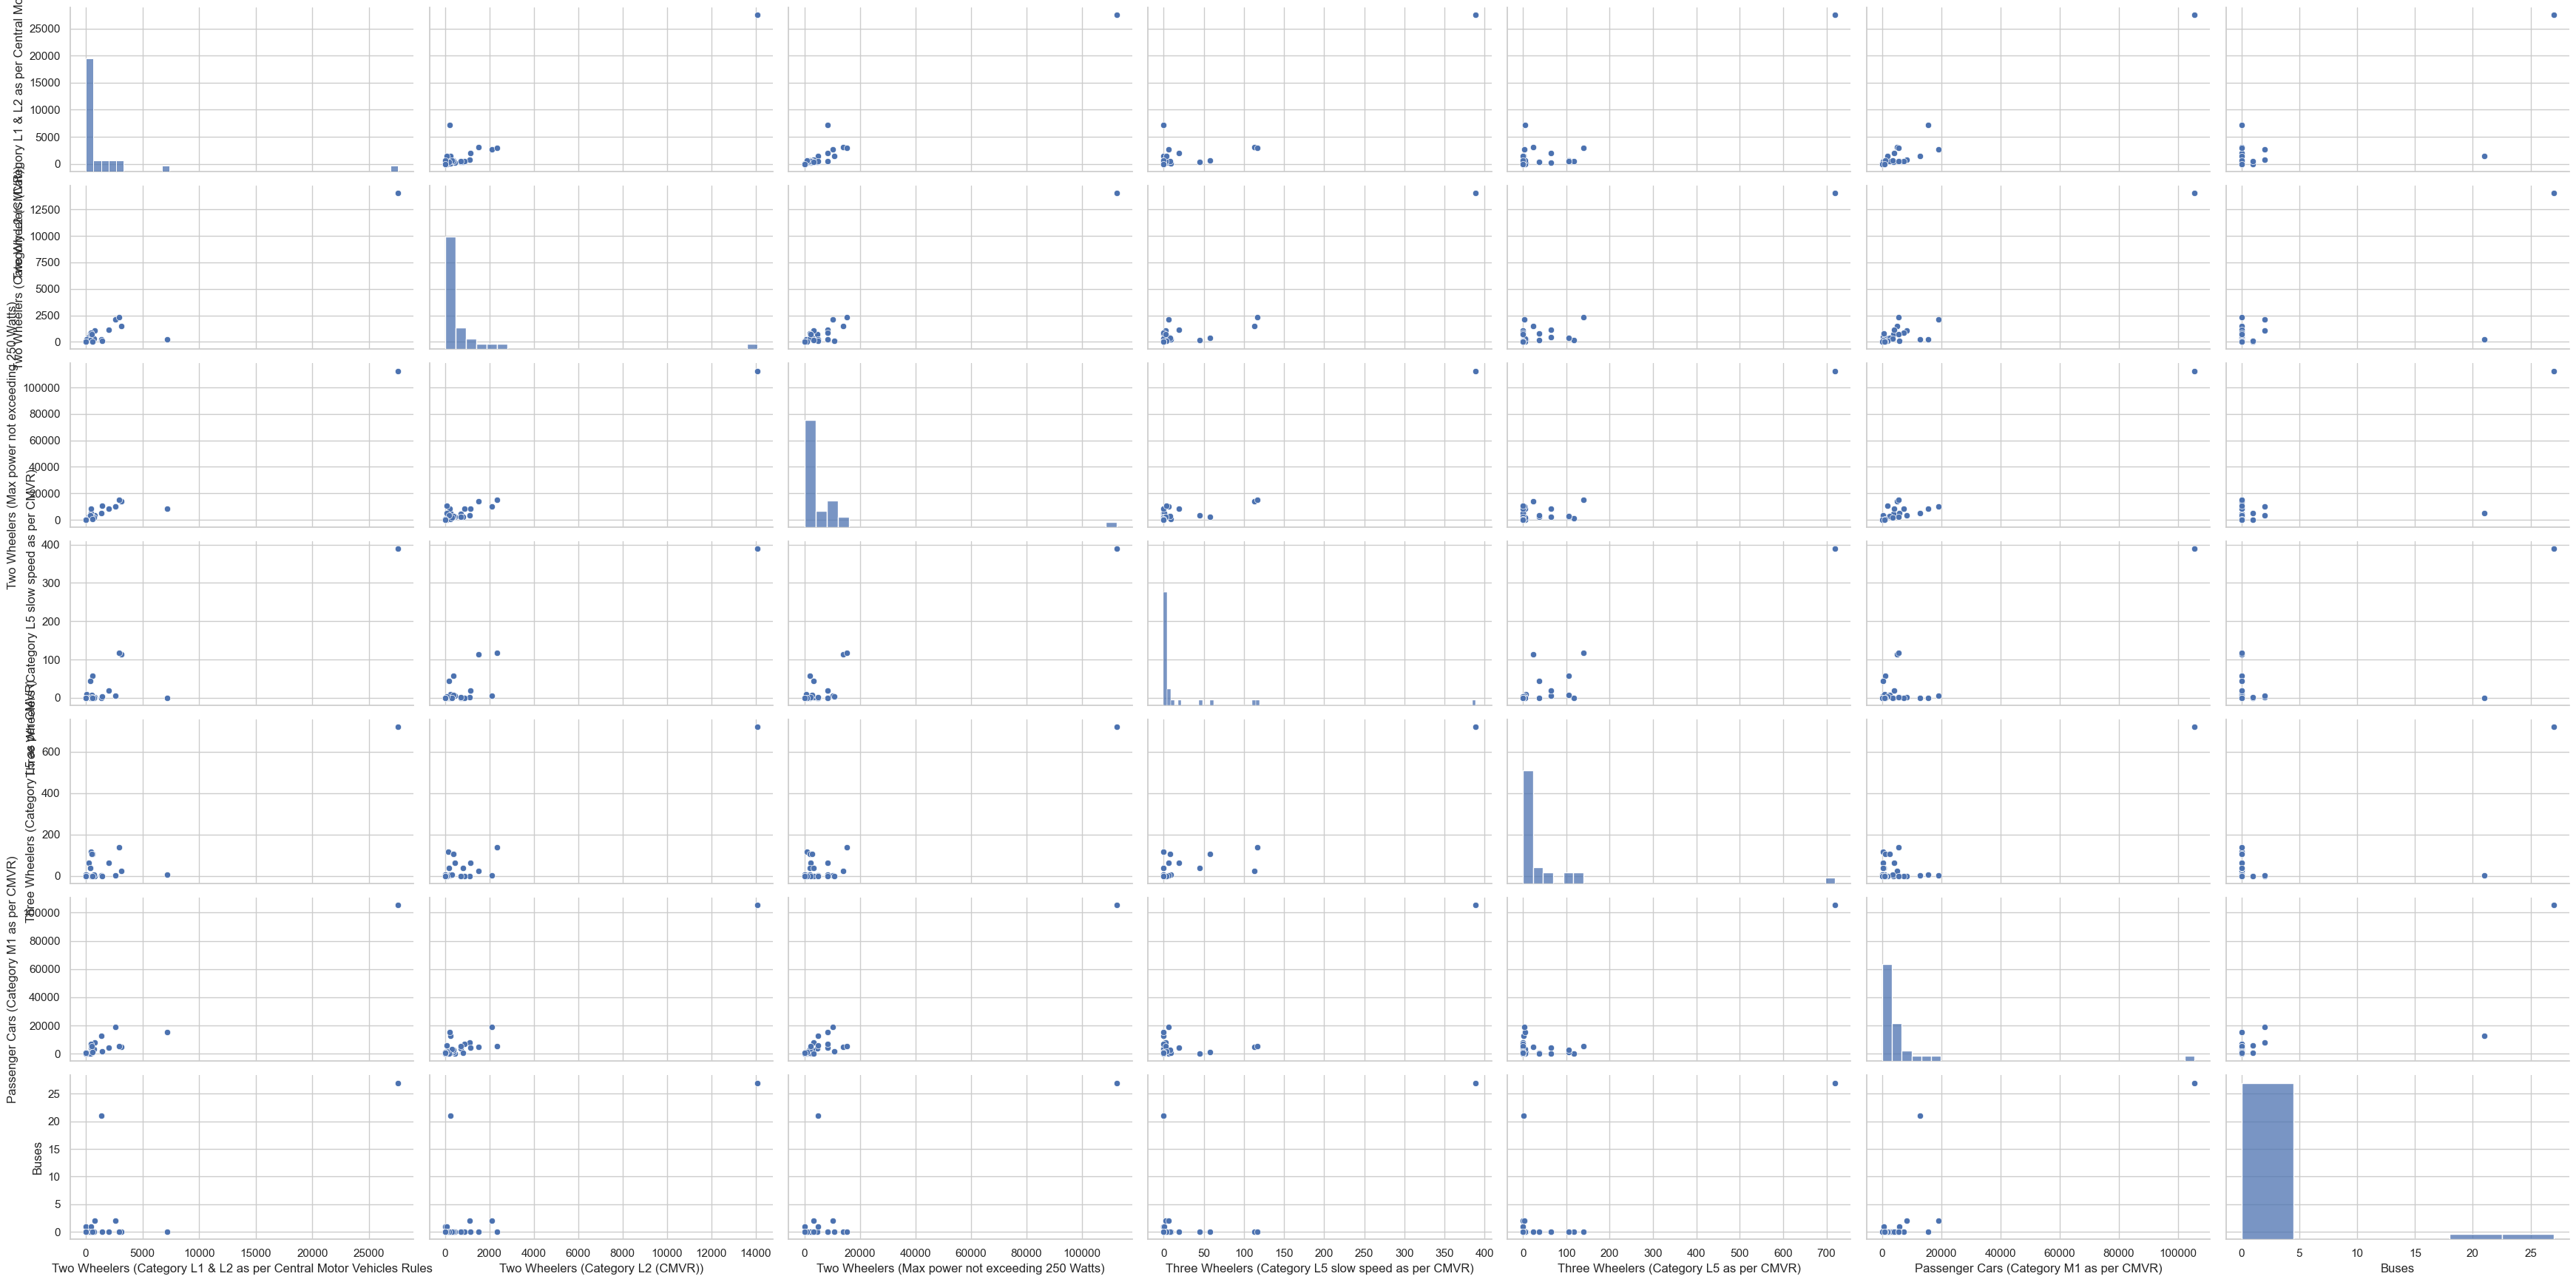

In [84]:
plt.figure(figsize=(15, 15))
pairplot = sns.pairplot(df2_num, aspect=2, height=2.5)

plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.tight_layout()
plt.show()


The above pairplot shows the relation between all the numerical columns

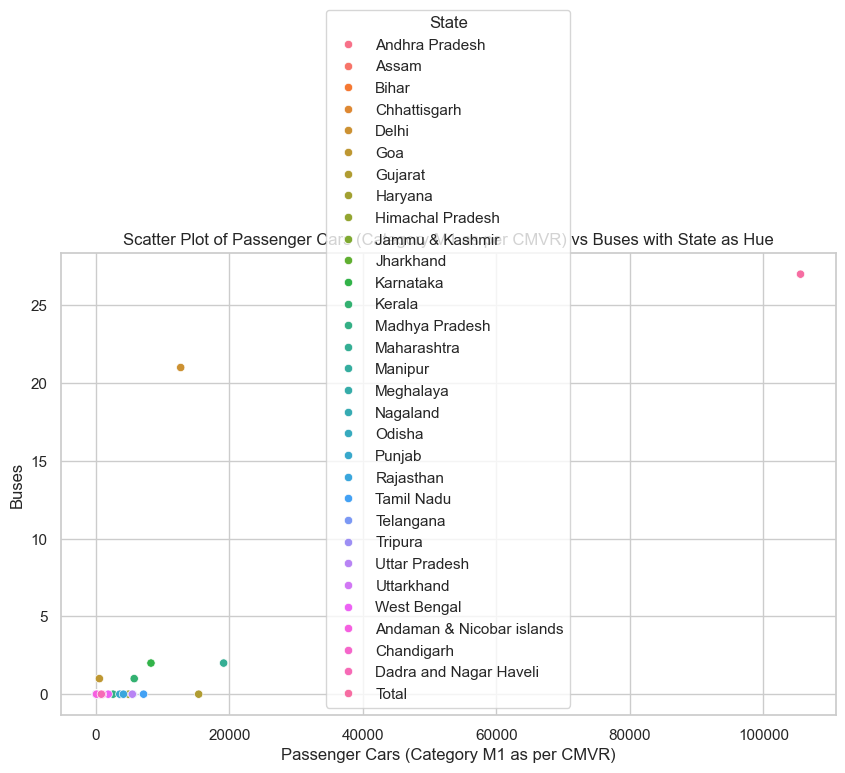

In [85]:
numerical_columns = ['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
                     'Two Wheelers (Category L2 (CMVR))',
                     'Two Wheelers (Max power not exceeding 250 Watts)',
                     'Three Wheelers (Category L5 slow speed as per CMVR)',
                     'Three Wheelers (Category L5 as per CMVR)',
                     'Passenger Cars (Category M1 as per CMVR)',
                     'Buses']
categorical_column = 'State'

# Choose two numerical columns for the scatter plot
x_variable = numerical_columns[5]
y_variable = numerical_columns[6]

# Create a scatter plot with hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_variable, y=y_variable, hue=categorical_column, data=df)
plt.title(f'Scatter Plot of {x_variable} vs {y_variable} with {categorical_column} as Hue')
plt.show()


- The no. of buses are much less as compared to no. of EV cars in all states.